PROBLEM STATEMENT:
    This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

--> Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

--> Output: Number of predicted wins (W)

# UPLOADING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.shape  ###check no of rows and coloumns in our dataset

(30, 17)

In [6]:
df.info()  ###used to find the null valuses,datatypes in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.isna().sum()  ###Helps to find the missing values present in the dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.describe()  ###describes the statistical analysis of dataset.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


As we have smaller dataset, we use transpose method to understand more clear about our dataset.This describe method helps to look mean,standard deviation,25%,50%,75% of our dataset.
    we can see some skewness present in our dataset,and also shows no abnormalities present here.

# SKEWNESS IN OUR DATASET

In [10]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

It is seen that HR,SHO,SV,H,CG,R have skewness and we need to bring it to range +/-0.5 

# VISUALIZATION

Univariate Analysis

# Strip Plot

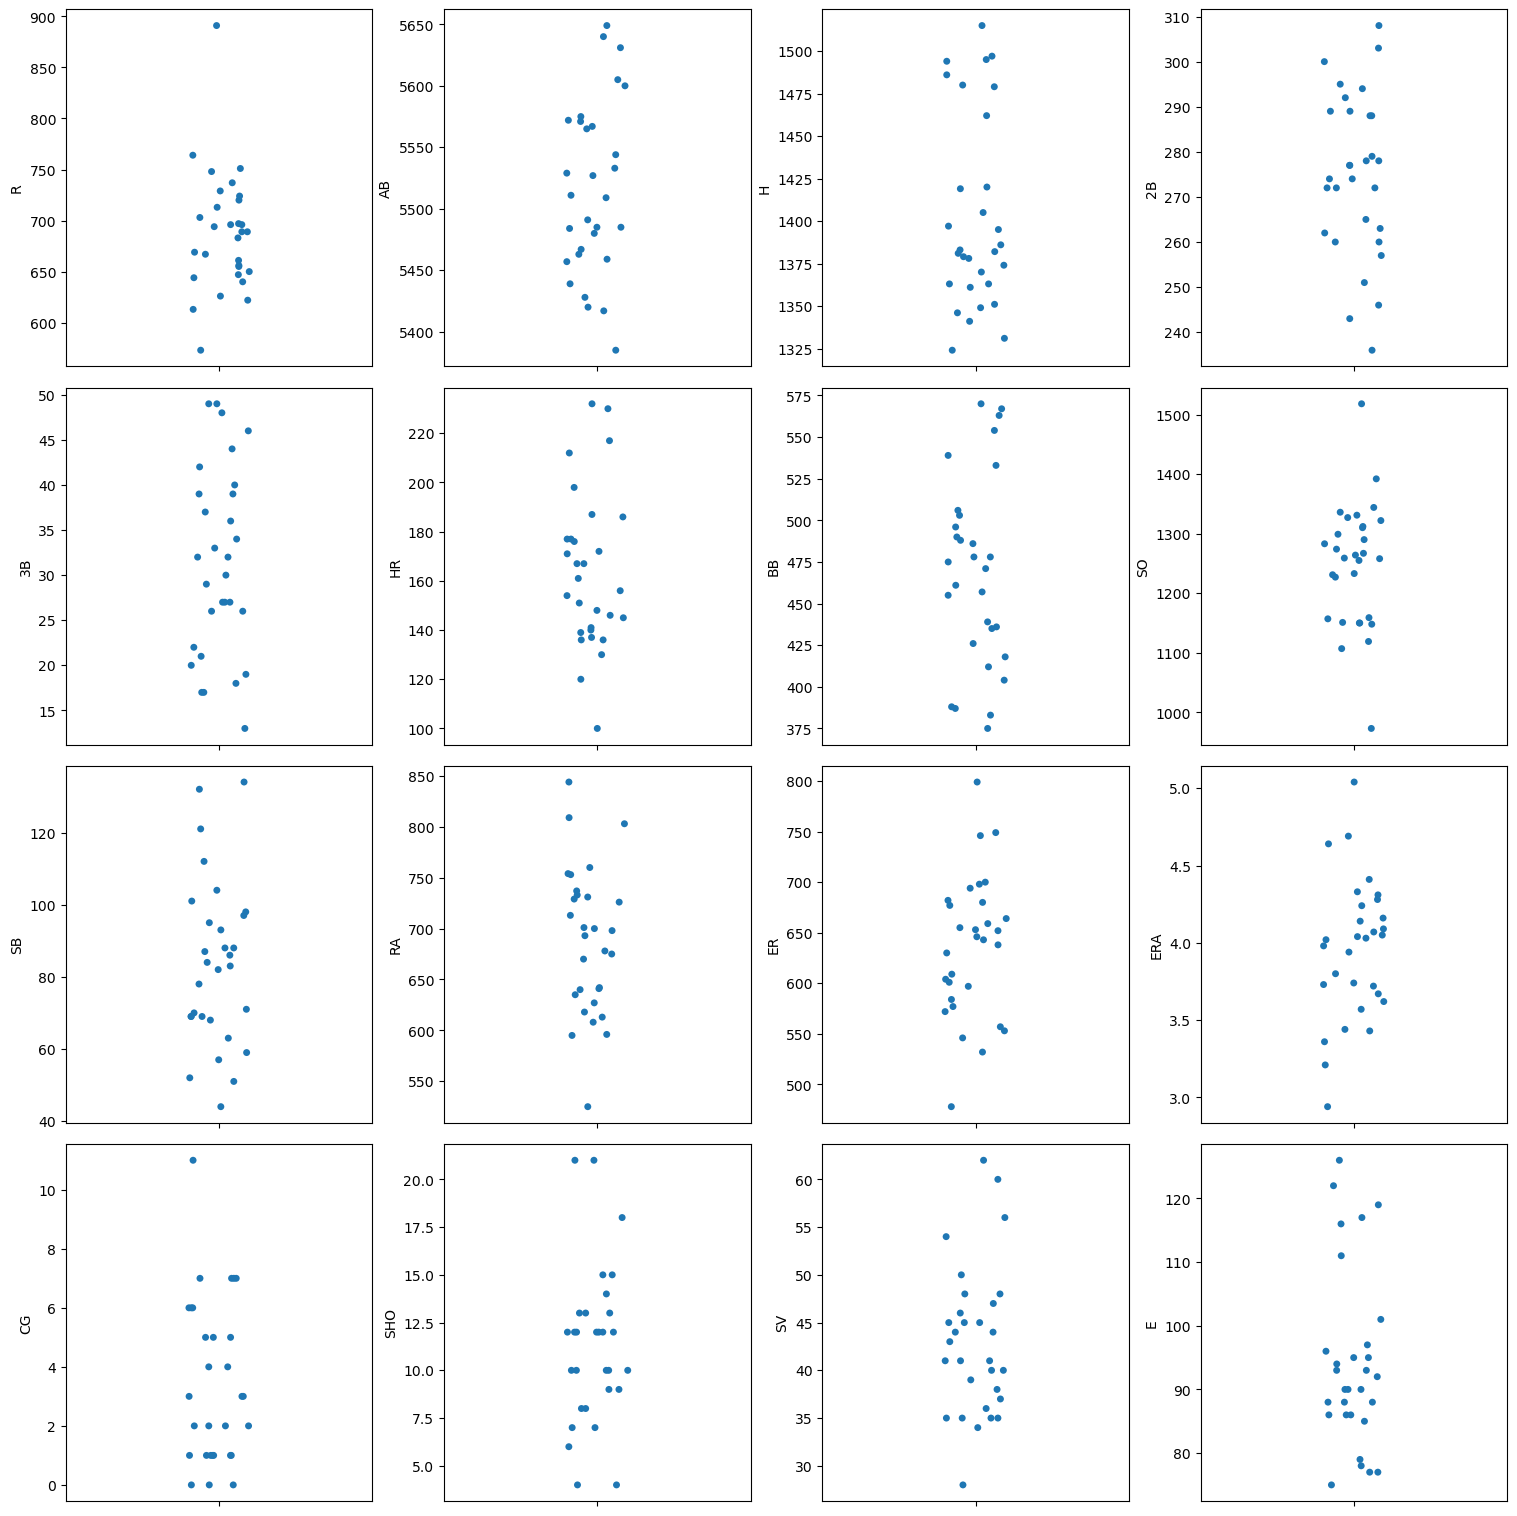

In [11]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("W", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From this strip plot we come to know that outliers were present in some coloumn R,SO,CG,E.

# Box Plot

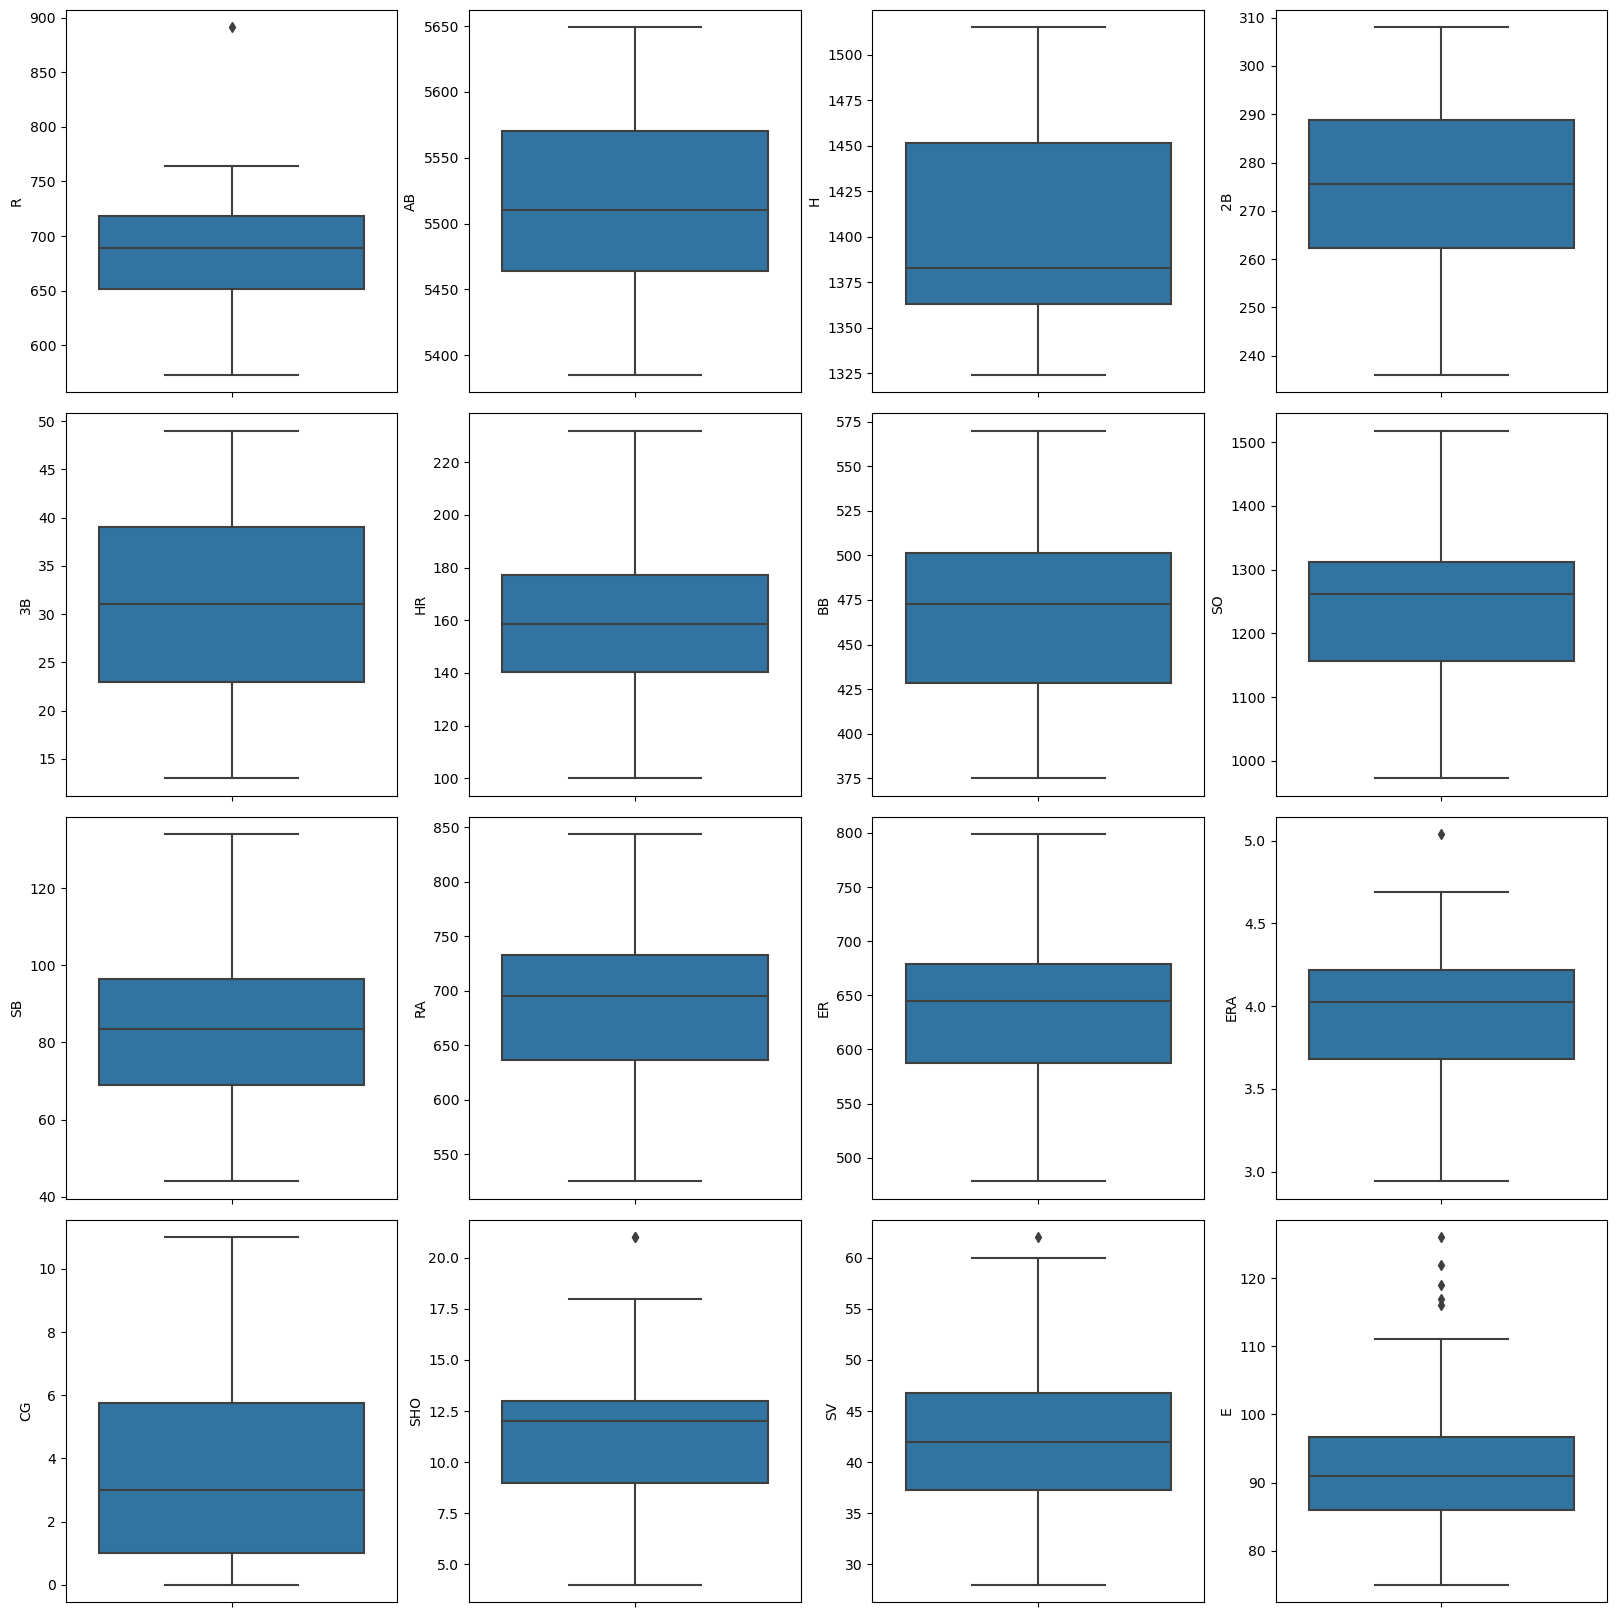

In [12]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(16,16))
index = 0
features = df.drop("W", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

This box plot clearly tell us the outliers were present R,ERA,SHO,SV,E.ouliers must be treated before we built the model.

# Distribution Plot

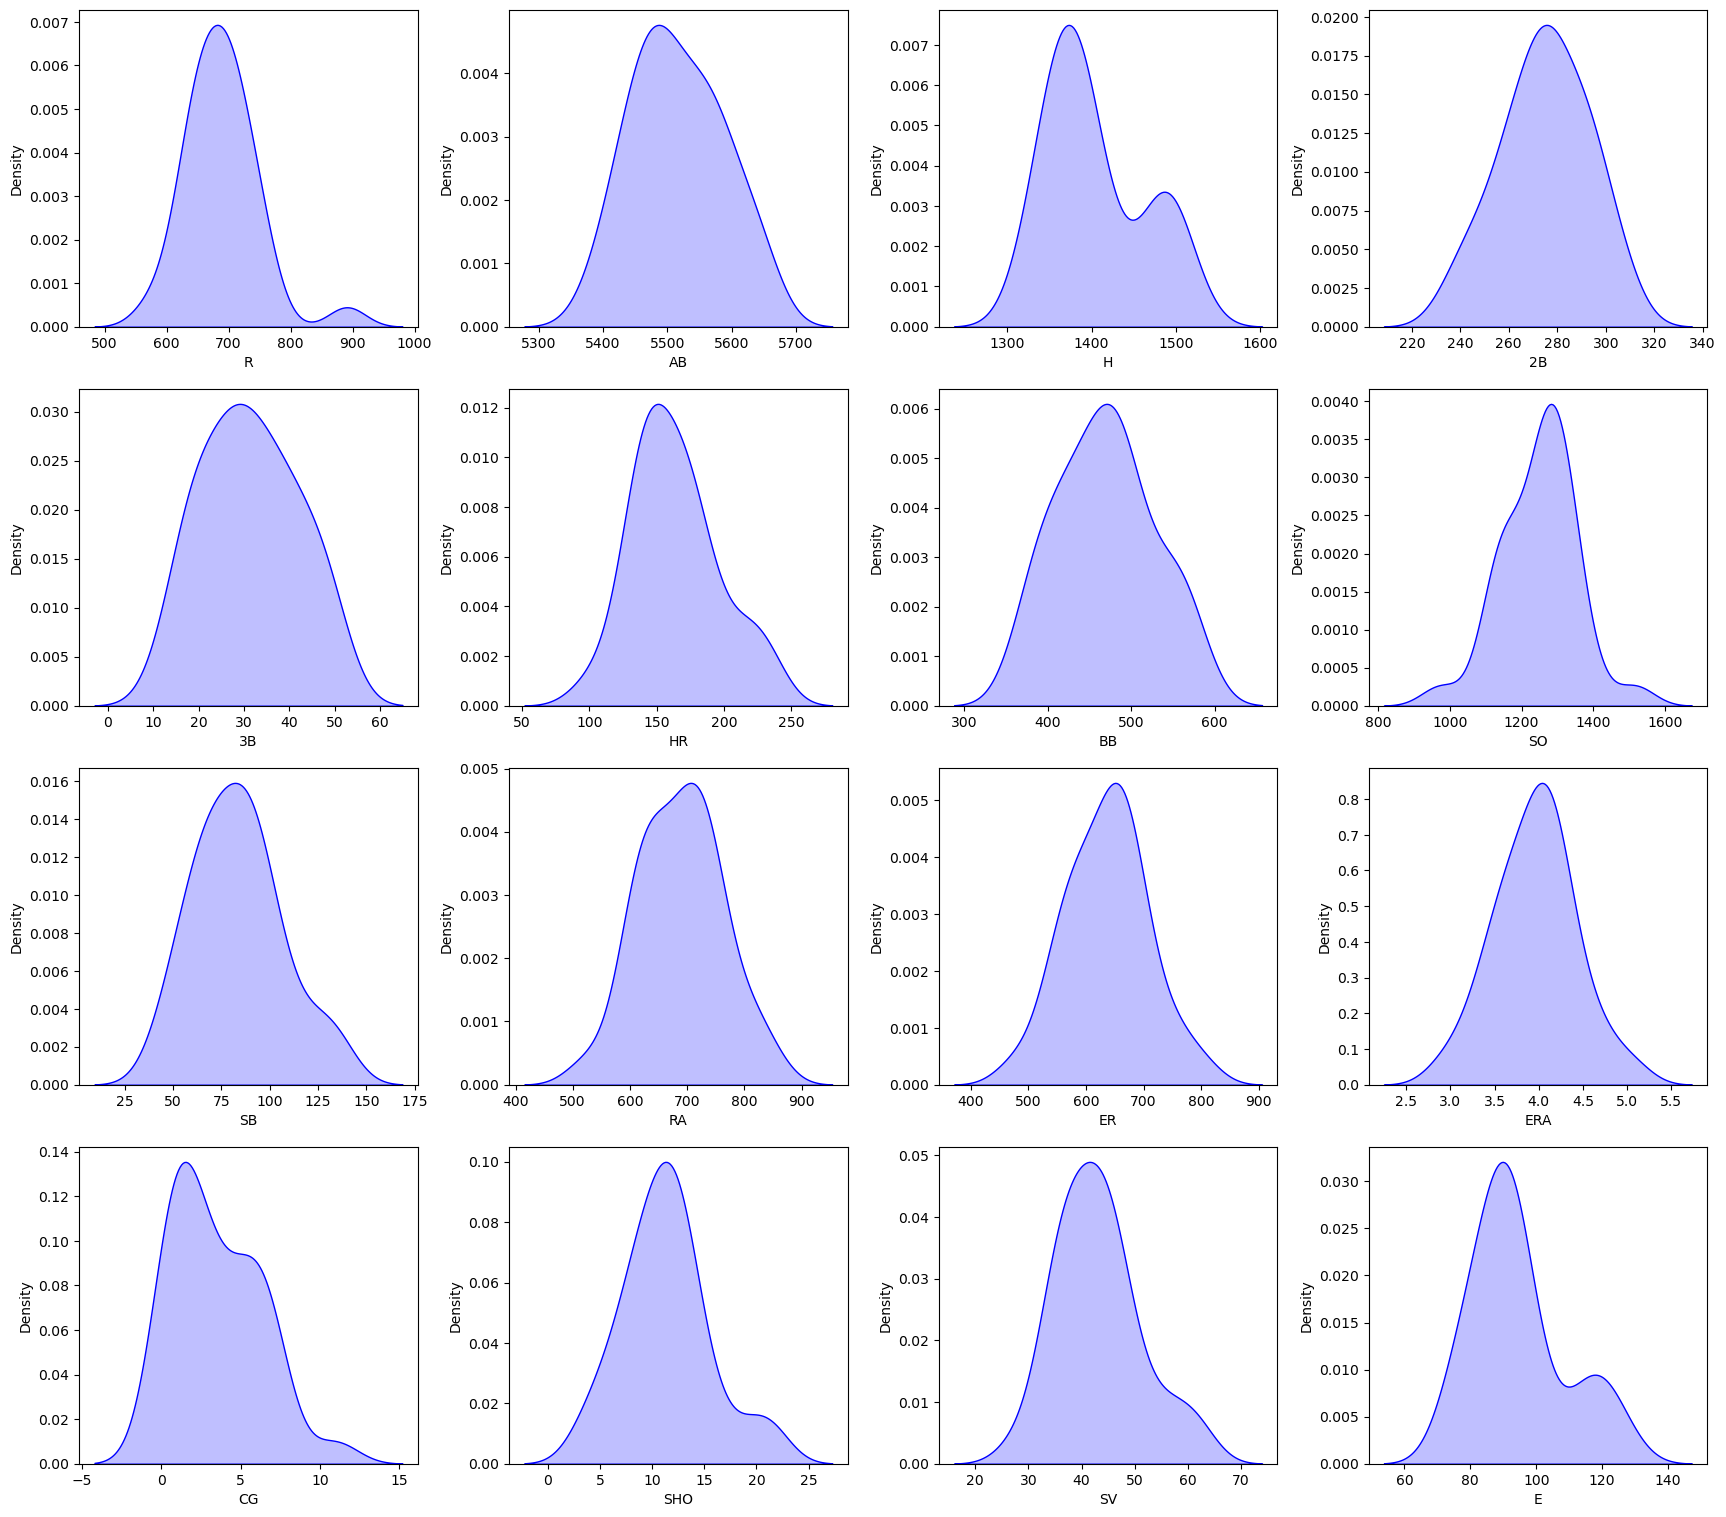

In [13]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("W", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Distribution Plot helps us to know the data is normally distributed.Here in our dataset some coloumn are normally distributed and coloumns like R,CG,SO,E have some skewness.

# BIVARIATE ANALYSIS

used to relate each feature coloumn with target coloumn

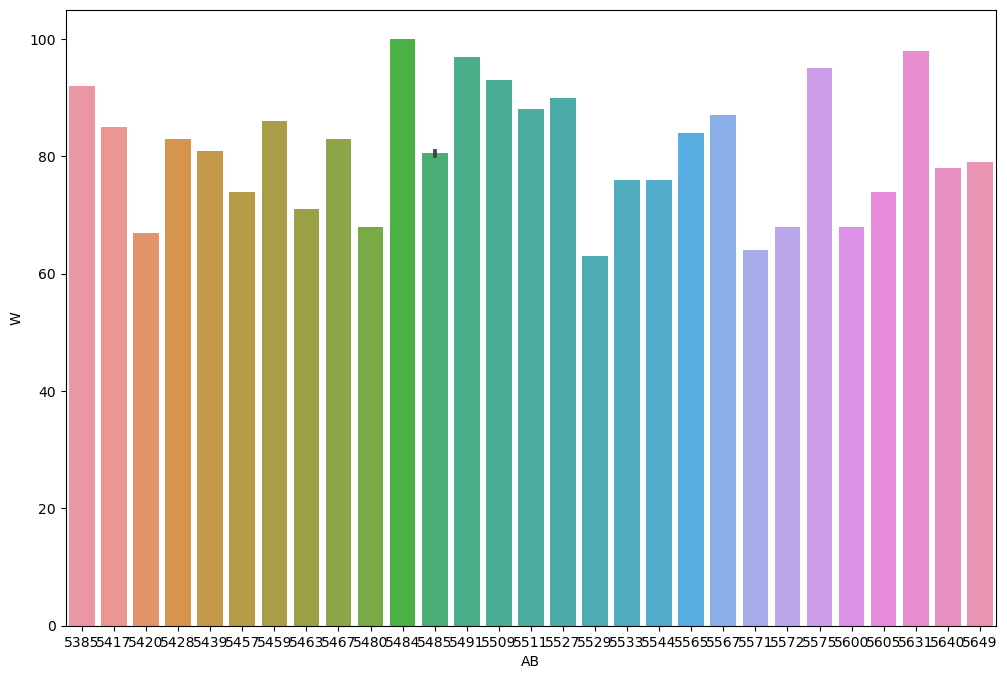

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x="AB", y="W", data=df)
plt.show()

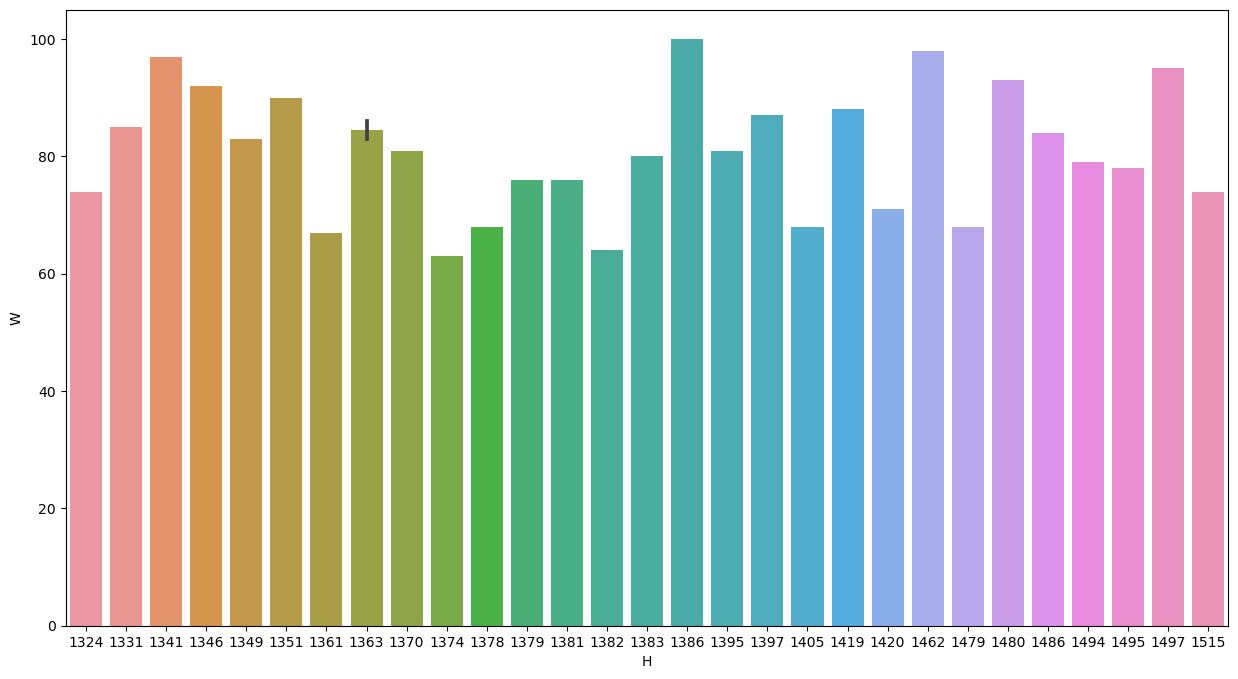

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x="H", y="W", data=df)
plt.show()

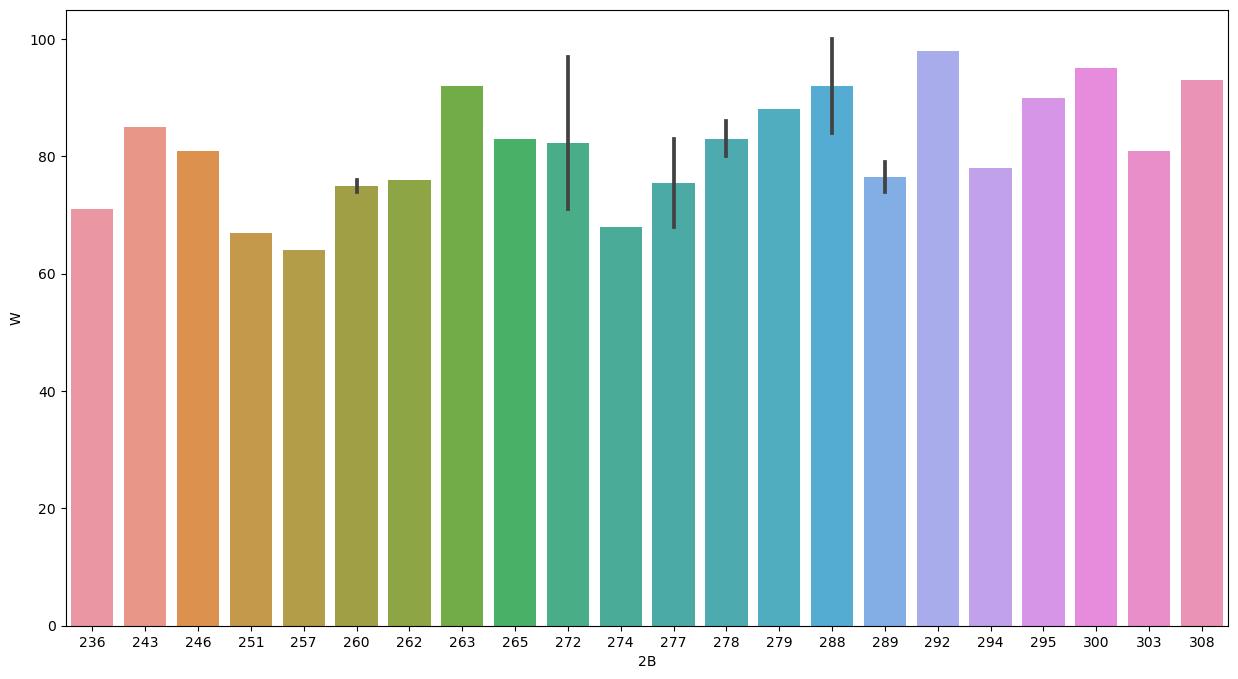

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x="2B", y="W", data=df)
plt.show()

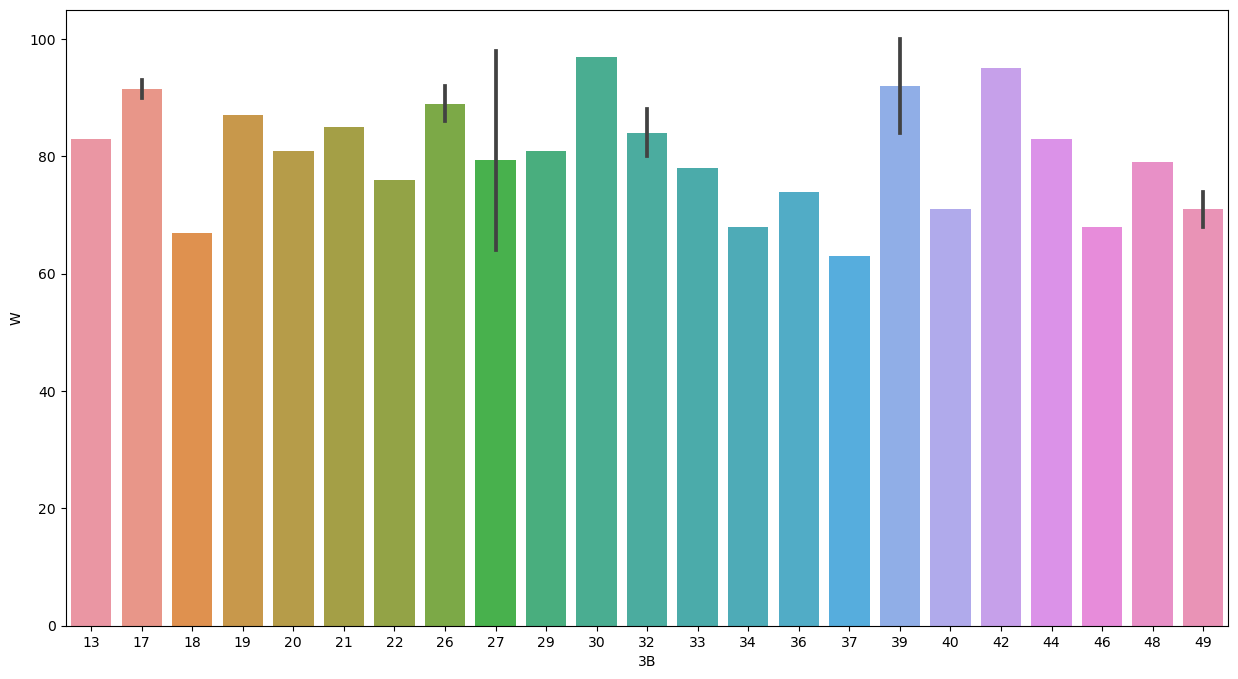

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x="3B", y="W", data=df)
plt.show()

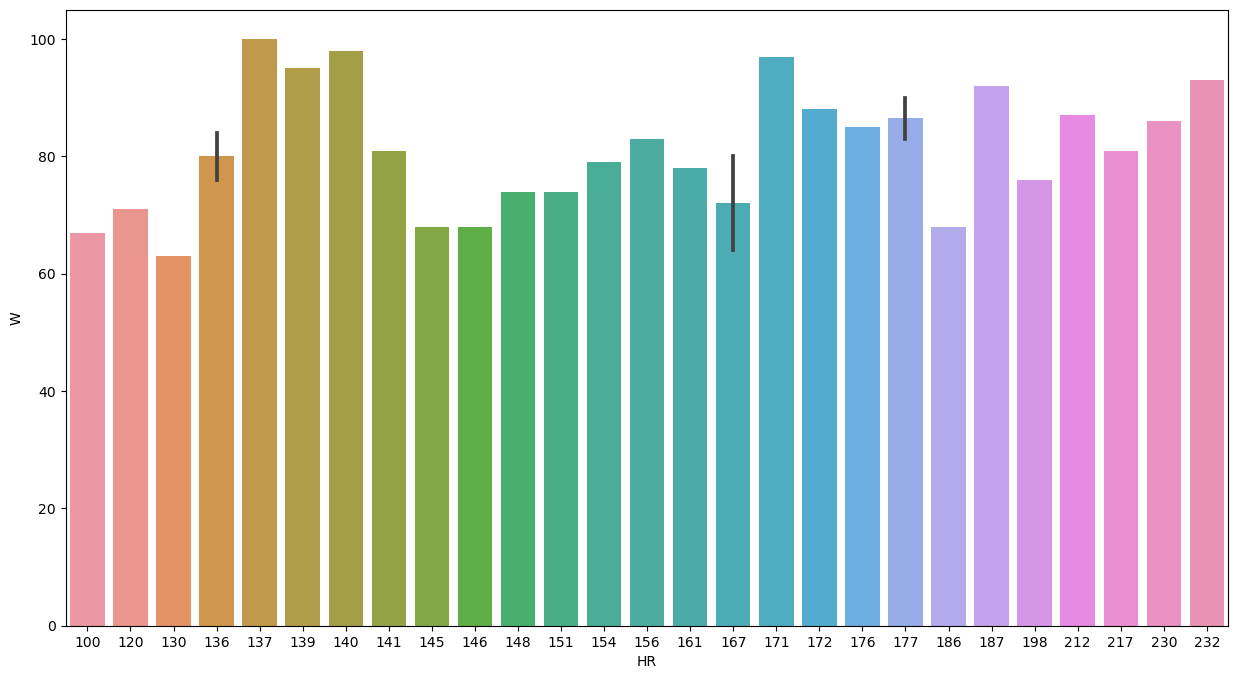

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x="HR", y="W", data=df)
plt.show()

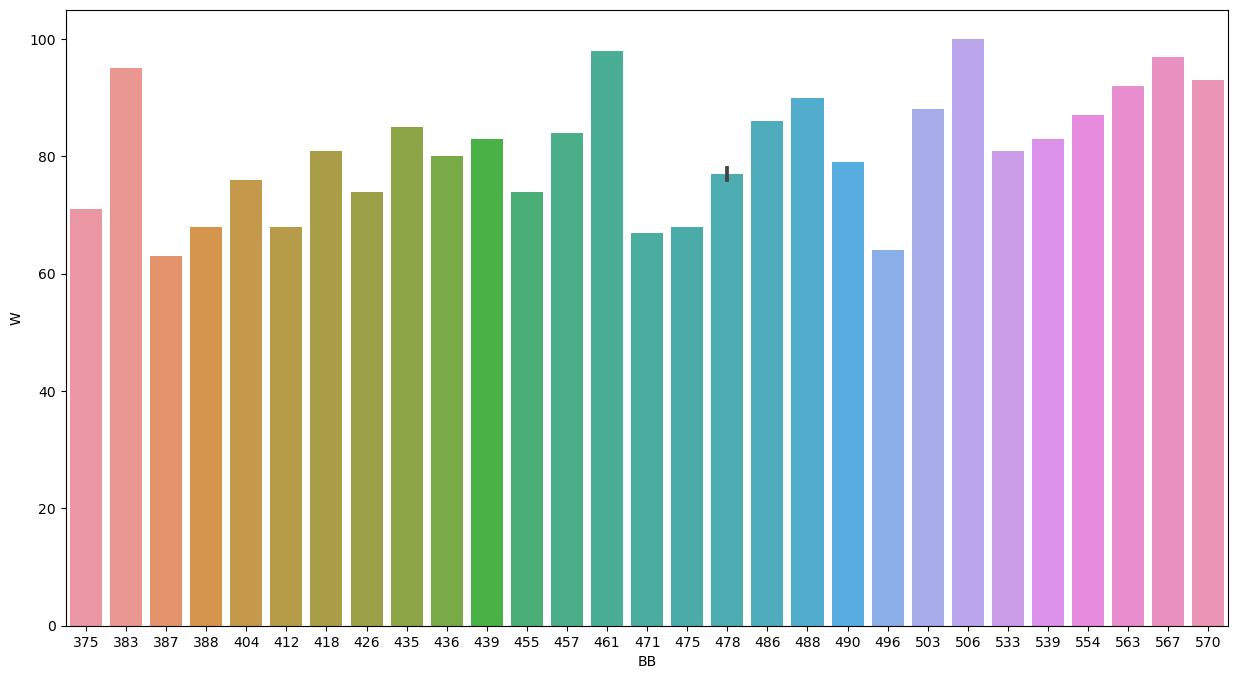

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x="BB", y="W", data=df)
plt.show()

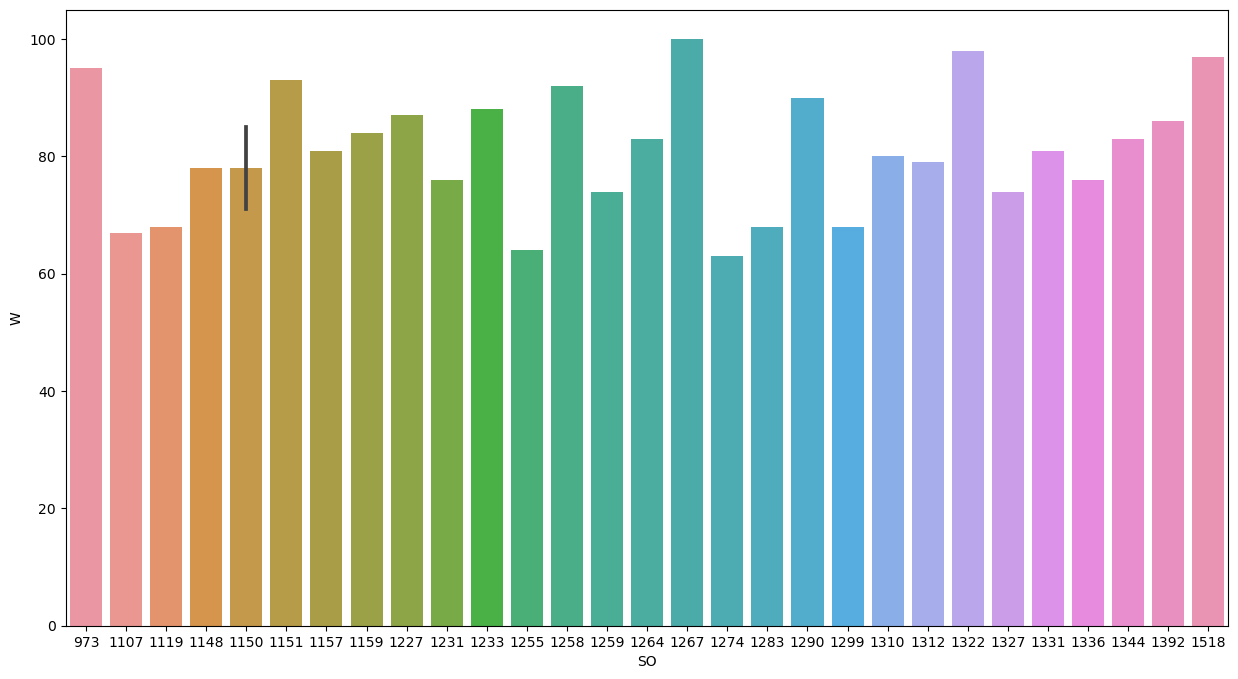

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x="SO", y="W", data=df)
plt.show()

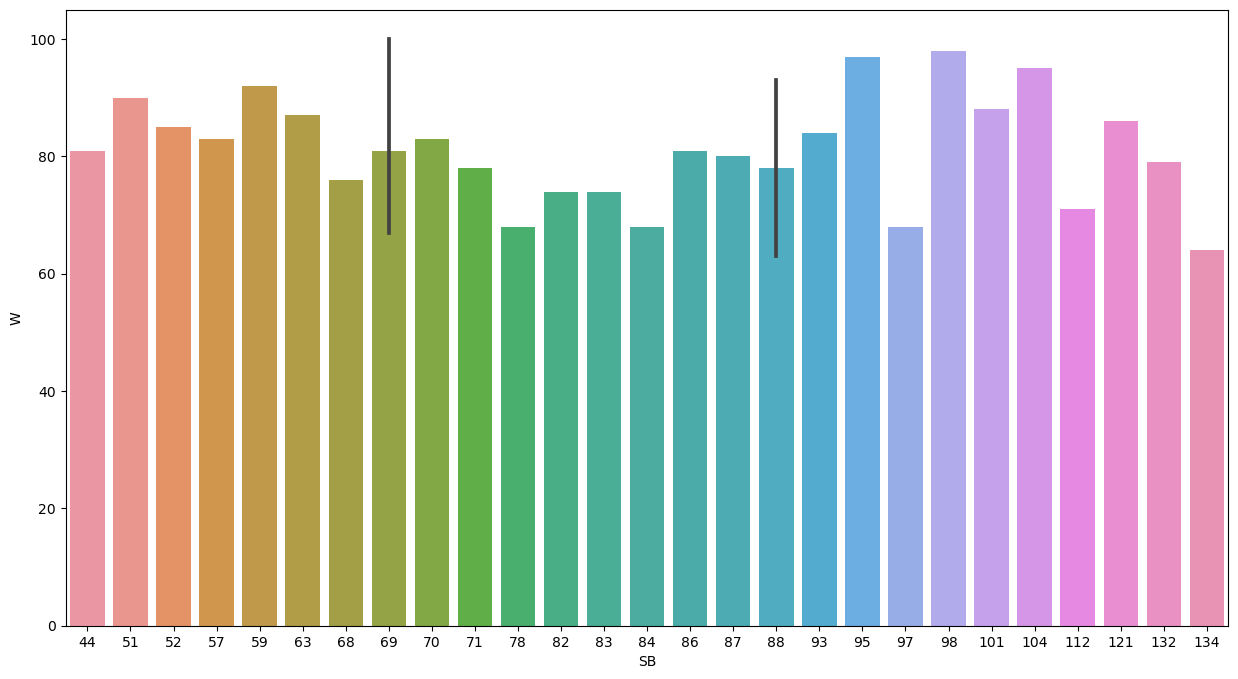

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x="SB", y="W", data=df)
plt.show()


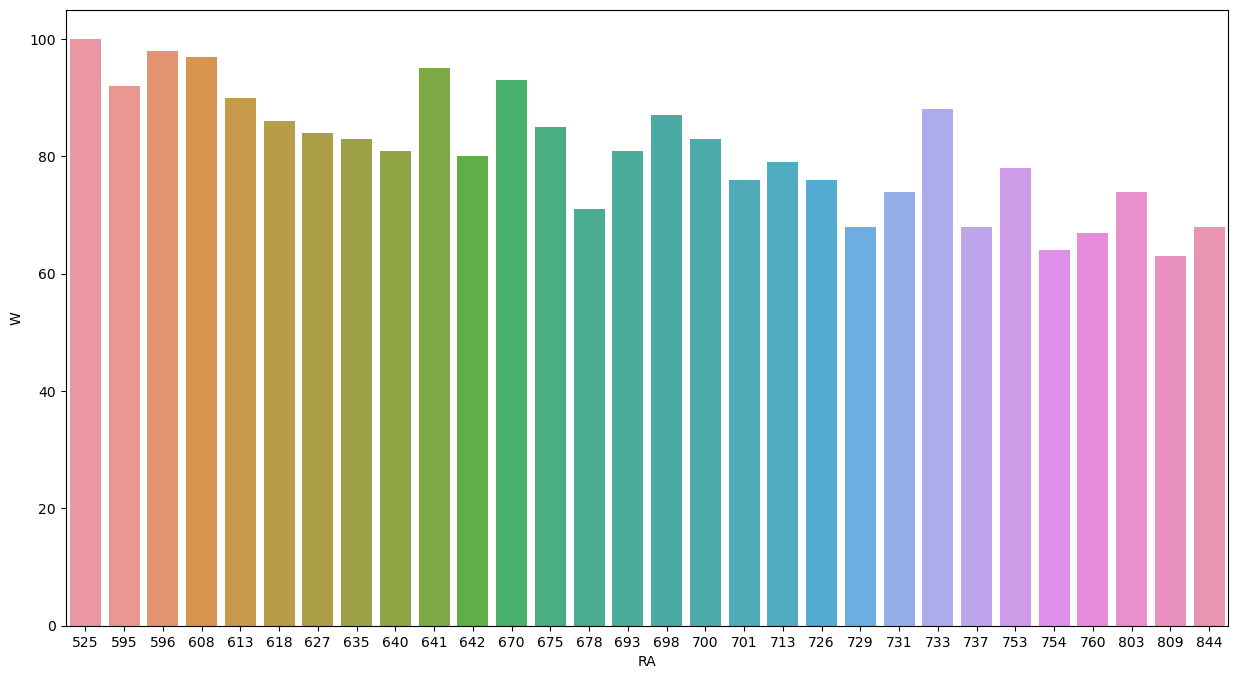

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x="RA", y="W", data=df)
plt.show()

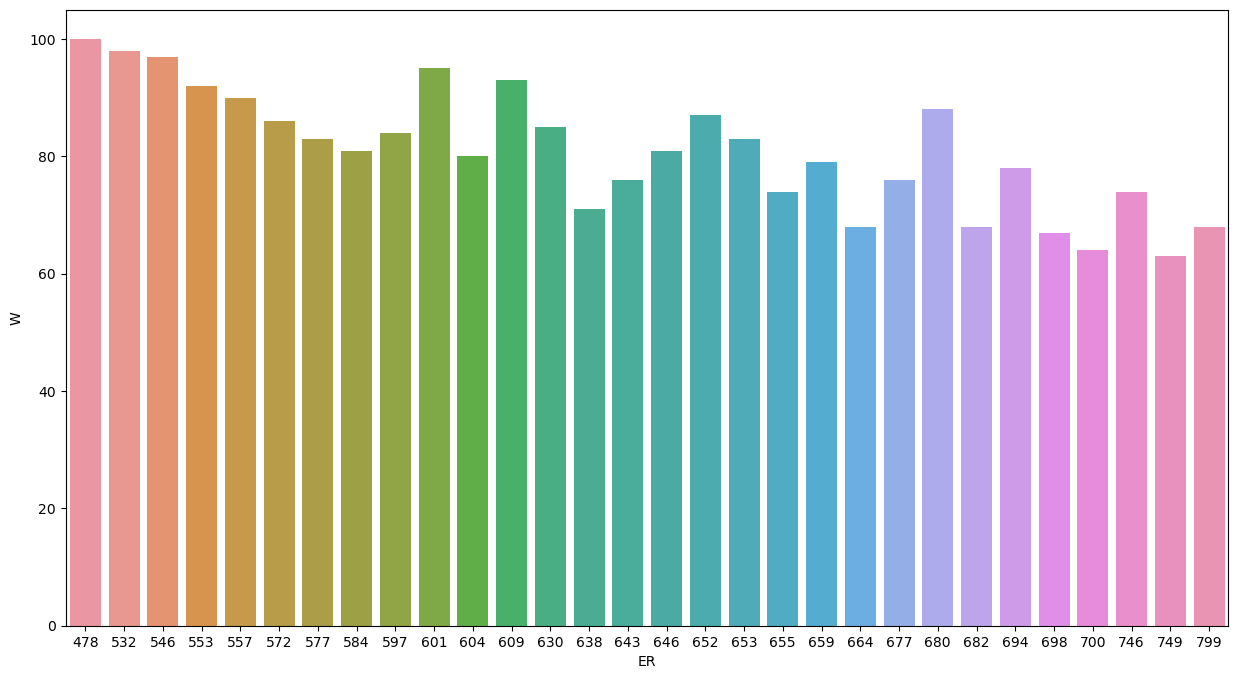

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x="ER", y="W", data=df)
plt.show()

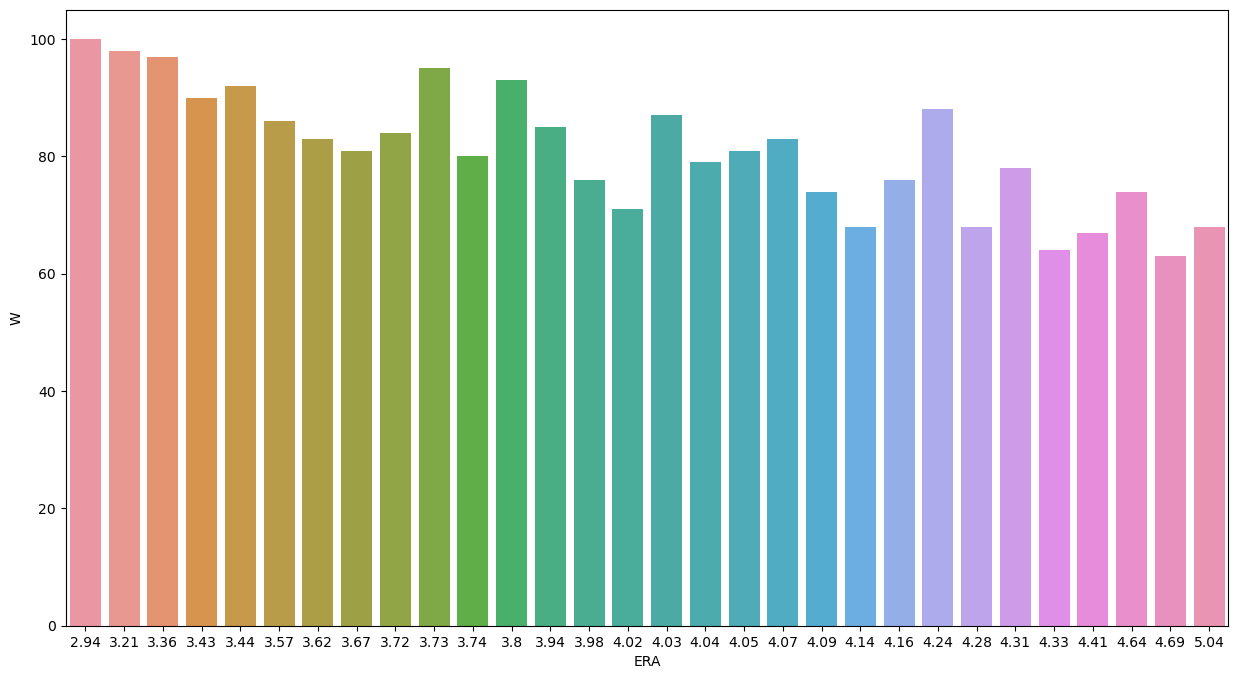

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x="ERA", y="W", data=df)
plt.show()

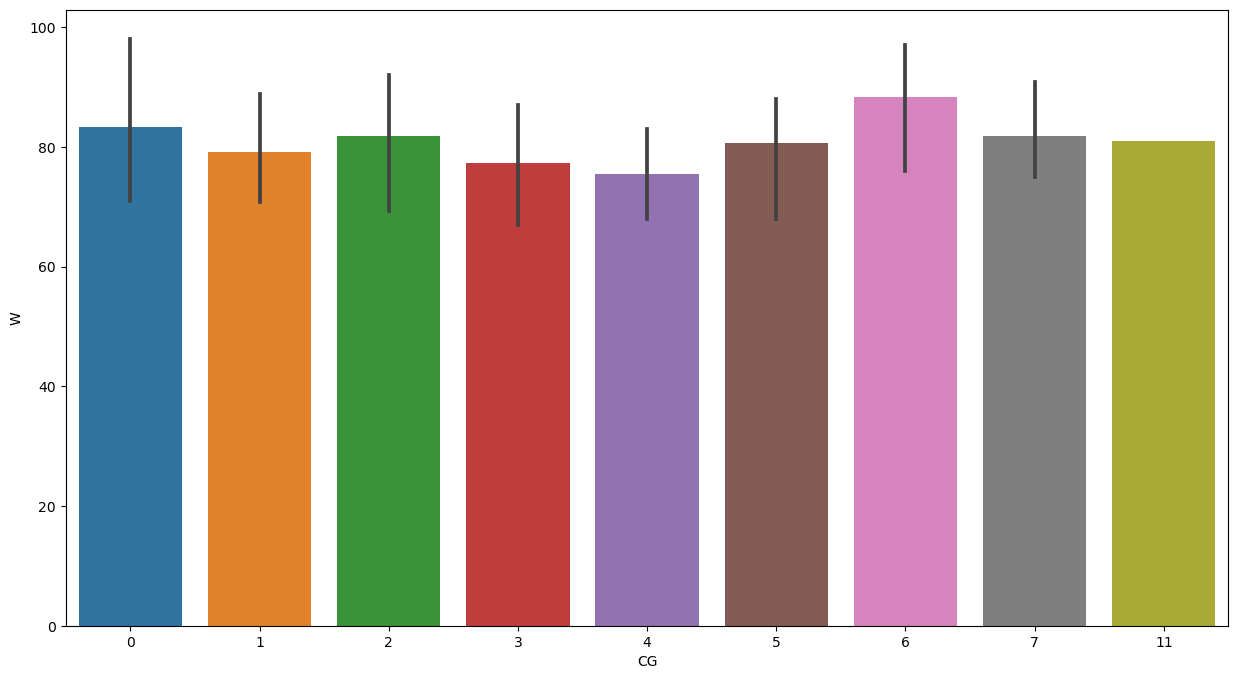

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x="CG", y="W", data=df)
plt.show()

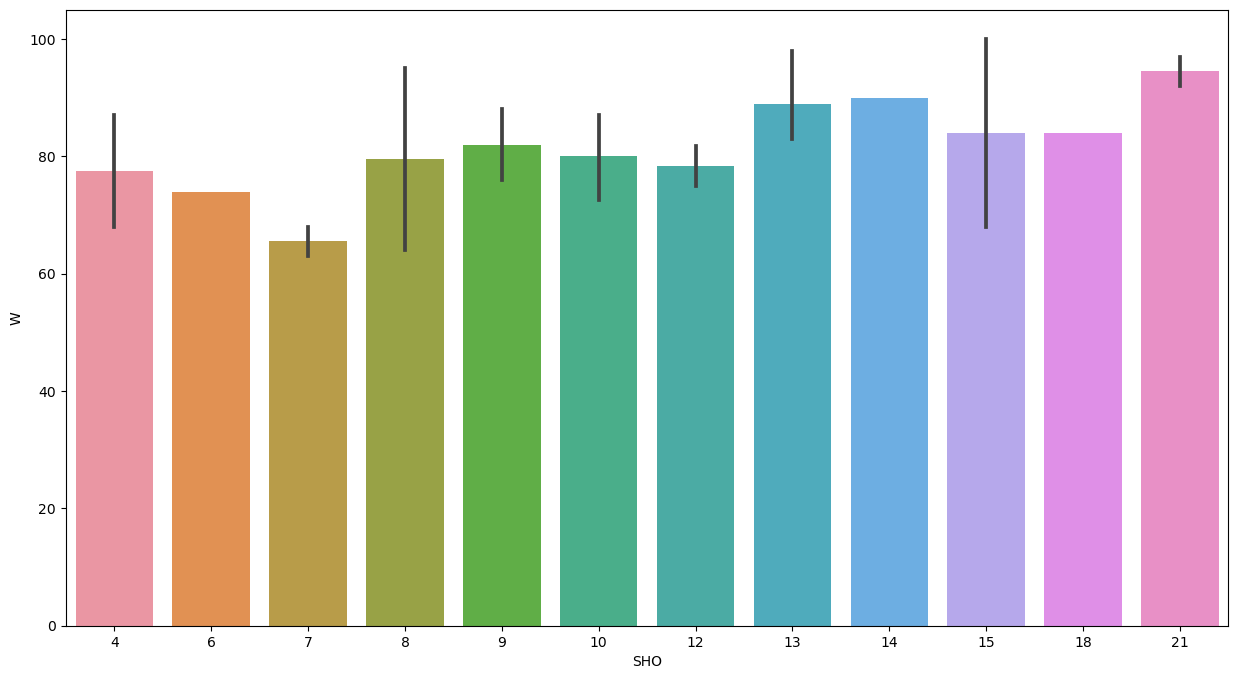

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x="SHO", y="W", data=df)
plt.show()


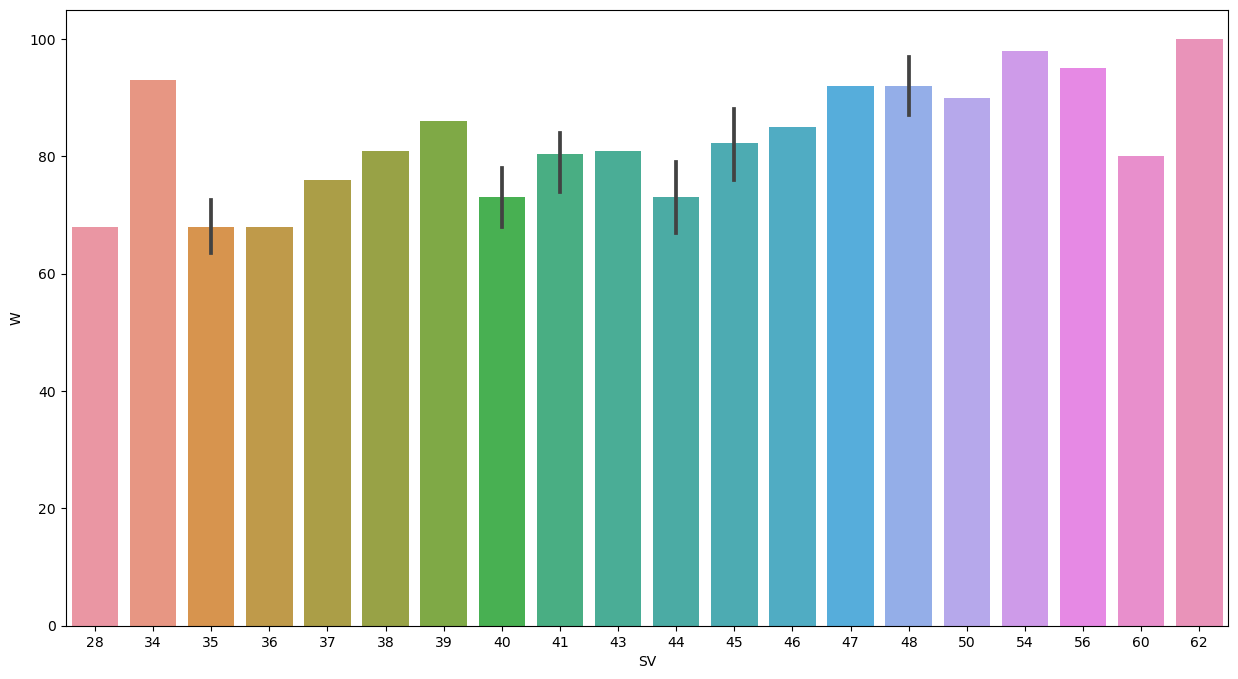

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x="SV", y="W", data=df)
plt.show()


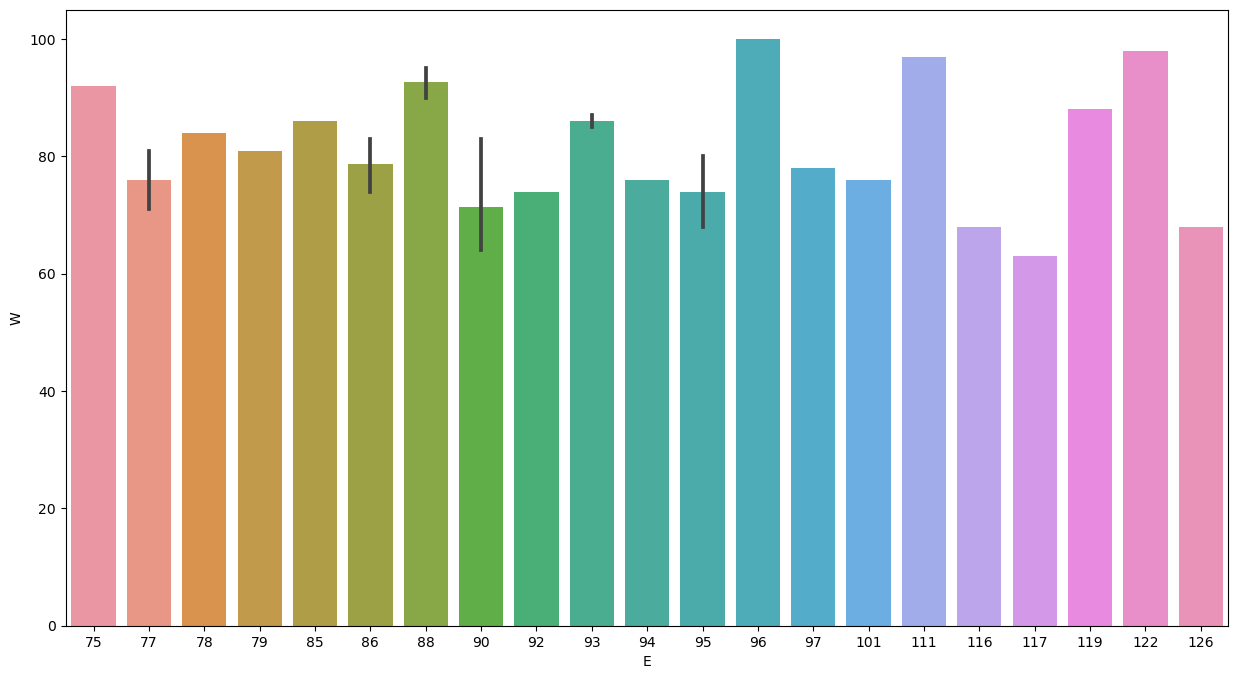

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x="E", y="W", data=df)
plt.show()

# Joint Plot

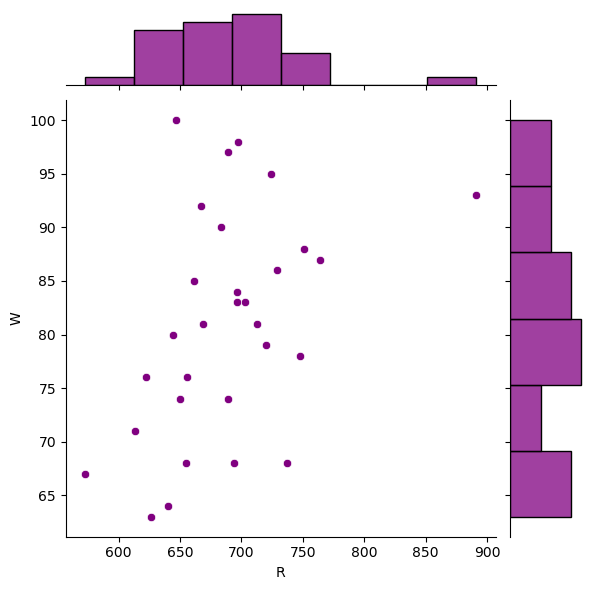

In [29]:
sns.jointplot(x="R", y="W", data=df, color="purple")

This shows if R increases W also increases

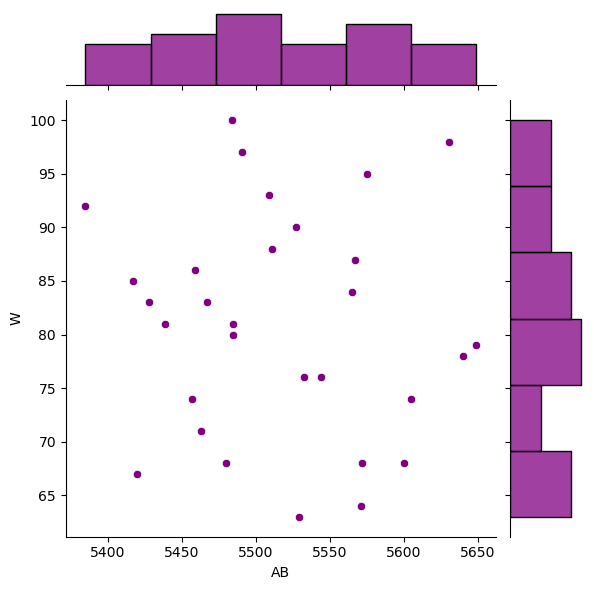

In [30]:
sns.jointplot(x="AB", y="W", data=df, color="purple")

shows some less relationship between AB and target W.

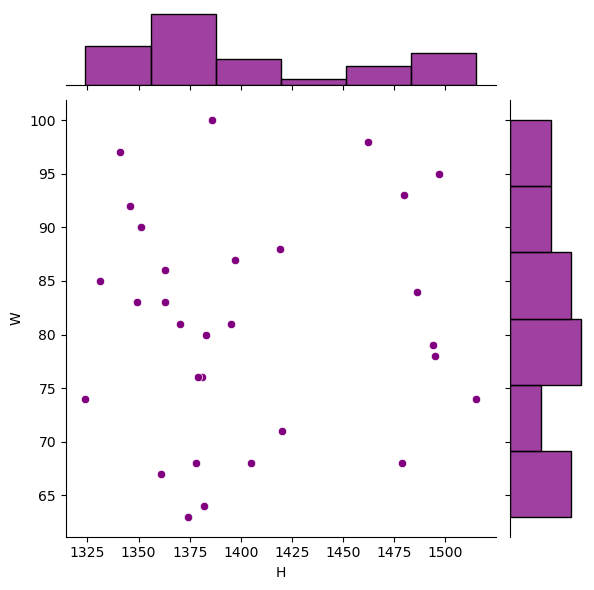

In [31]:
sns.jointplot(x="H", y="W", data=df, color="purple")

This Plot shows no linear relationship between the target variable and feature variable

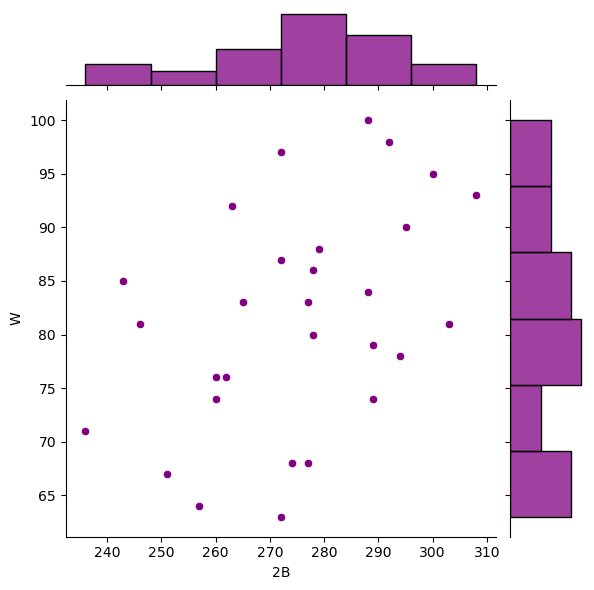

In [32]:
sns.jointplot(x="2B", y="W", data=df, color="purple")

This Plot shows some relationship with feature and target variable as 2B increases with W

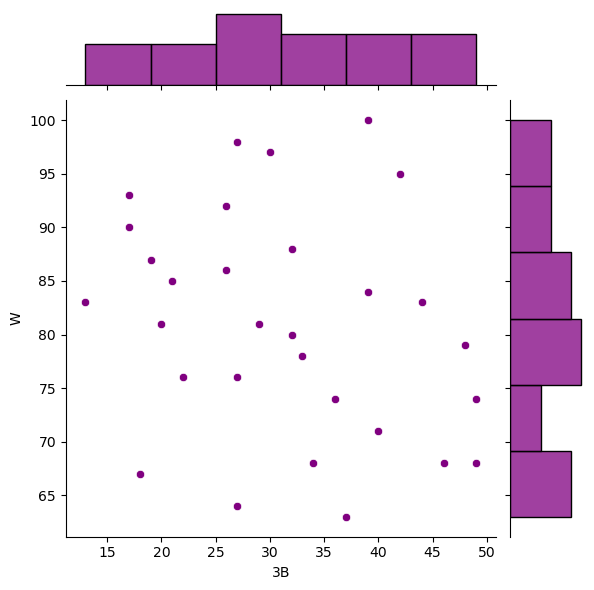

In [33]:
sns.jointplot(x="3B", y="W", data=df, color="purple")

Here the data were scattered and shows no relatioship with feature and target variable

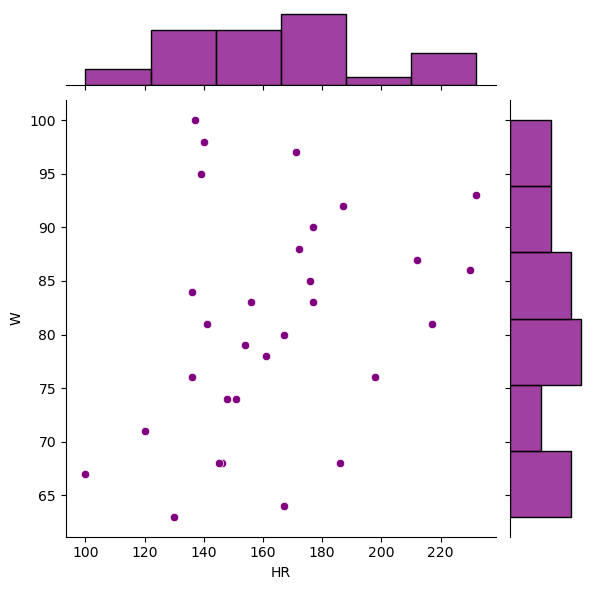

In [34]:
sns.jointplot(x="HR", y="W", data=df, color="purple")

THis Plot says there is some relationship between feature and target variable

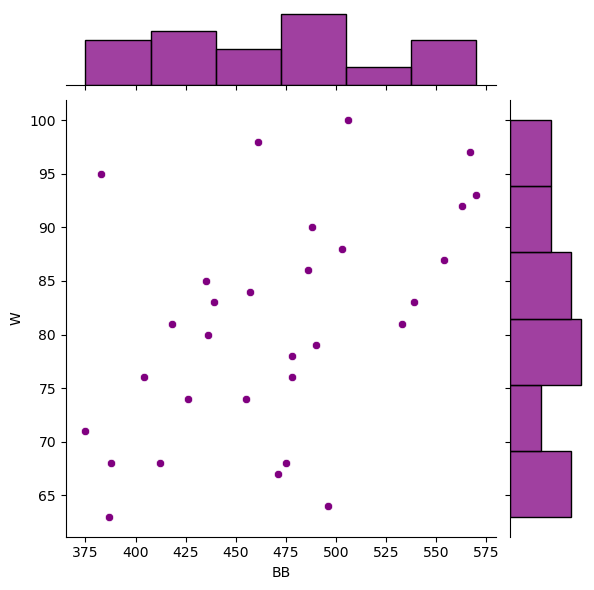

In [35]:
sns.jointplot(x="BB", y="W", data=df, color="purple")

some relation have been noticed between target and feature variable

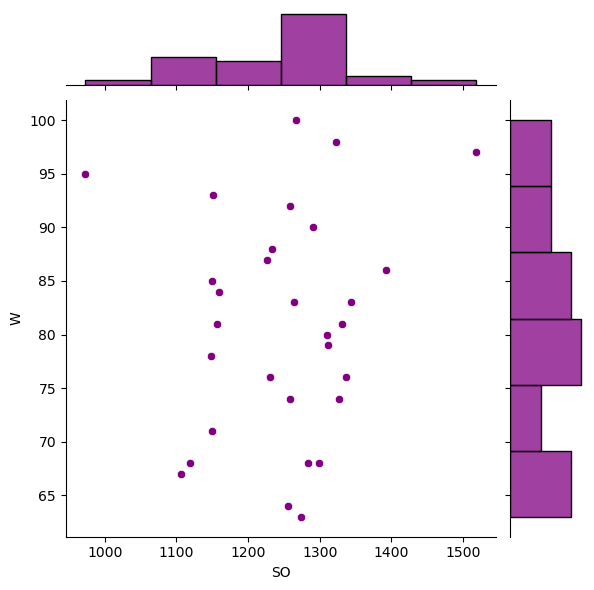

In [36]:
sns.jointplot(x="SO", y="W", data=df, color="purple")

There is no linear relation with target variable W

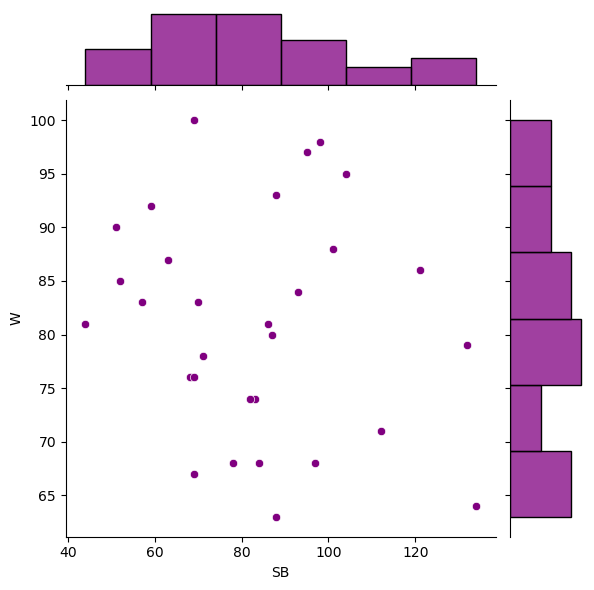

In [37]:
sns.jointplot(x="SB", y="W", data=df, color="purple")

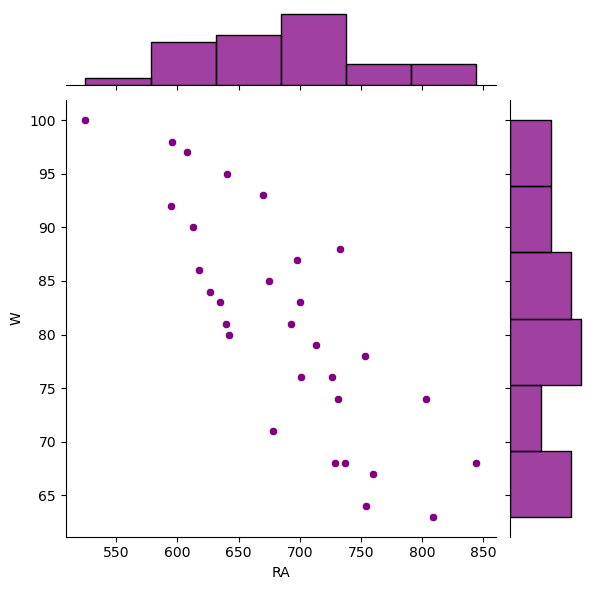

In [38]:
sns.jointplot(x="RA", y="W", data=df, color="purple")

It shows  they are negatively related with W

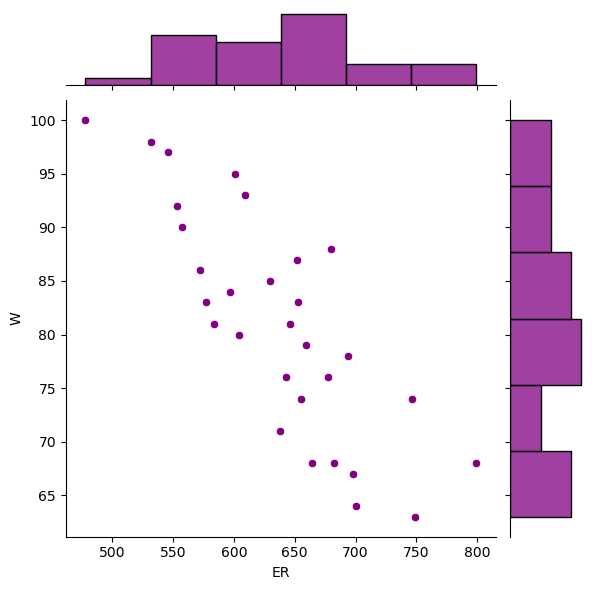

In [39]:
sns.jointplot(x="ER", y="W", data=df, color="purple")

This also shows they are negatively related to W

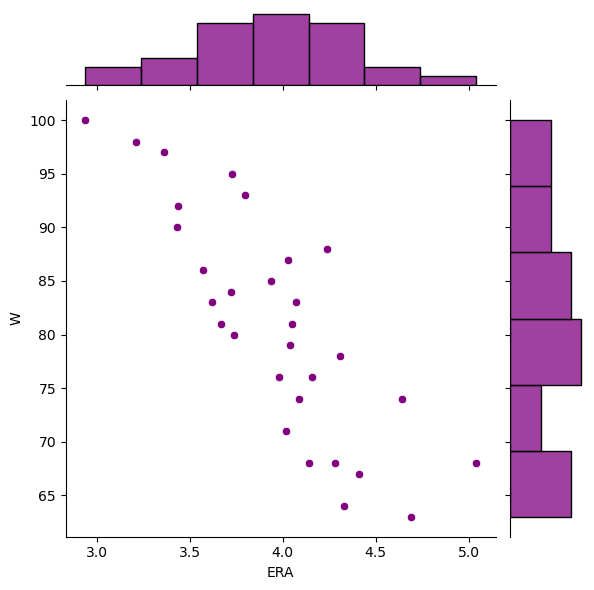

In [40]:
sns.jointplot(x="ERA", y="W", data=df, color="purple")

This also shows they are negatively related to W

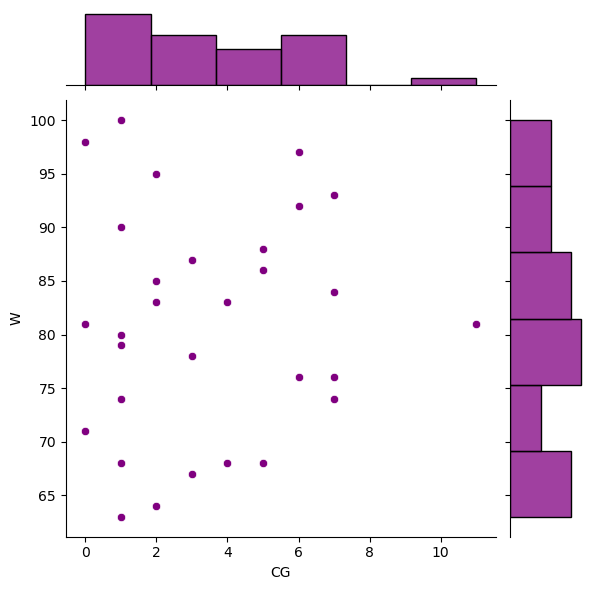

In [41]:
sns.jointplot(x="CG", y="W", data=df, color="purple")

We can see that as number of CG goes above 6 then the number of W is more than 75 and there is an outlying data present

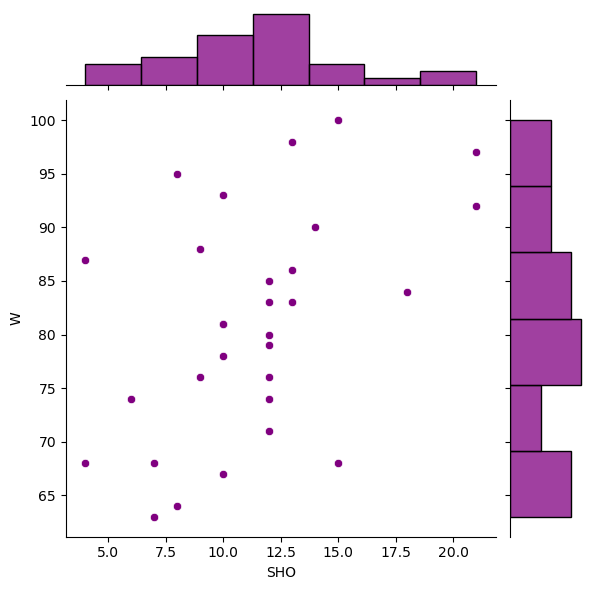

In [42]:
sns.jointplot(x="SHO", y="W", data=df, color="purple")

THis shows when feature coloumn increase target coloumn inceases

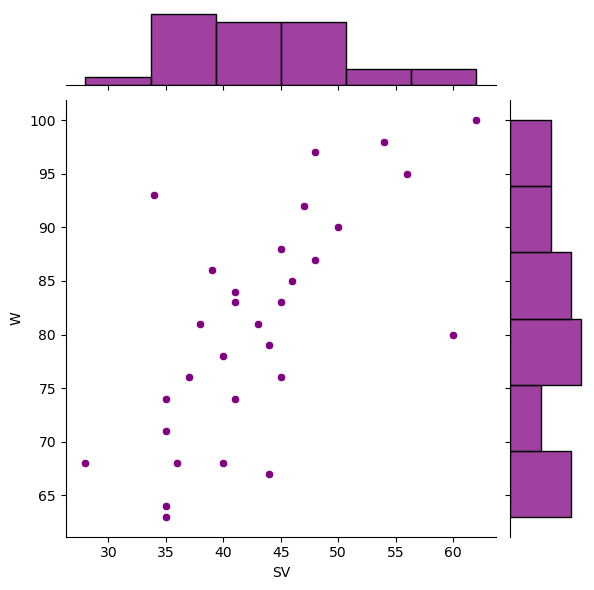

In [43]:
sns.jointplot(x="SV", y="W", data=df, color="purple")

It shows relationship between feature and target variable

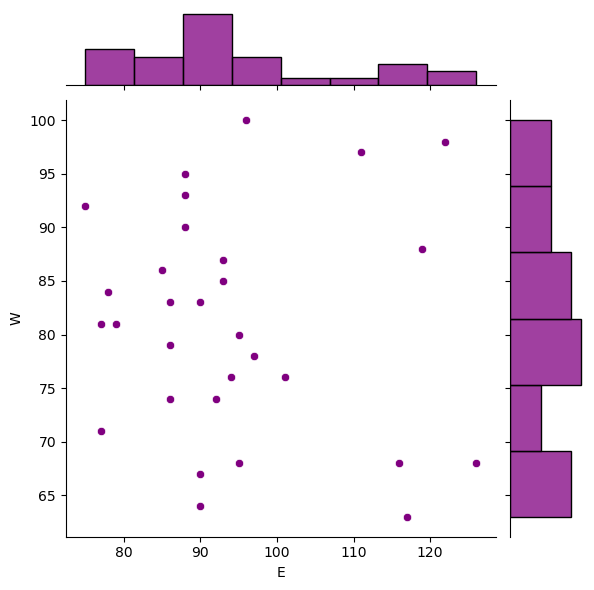

In [44]:
sns.jointplot(x="E", y="W", data=df, color="purple")

number of E are more in the range of 70 to 100 impact V.

# LM PLOT

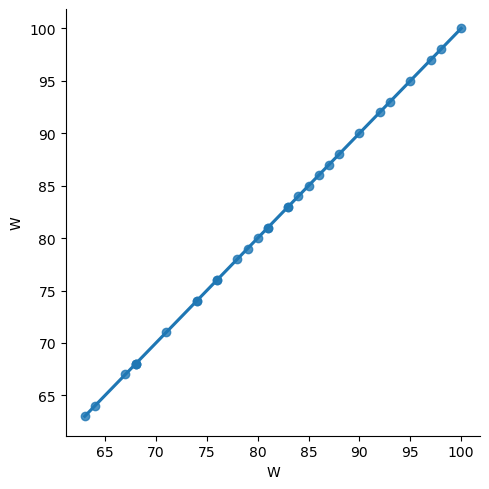

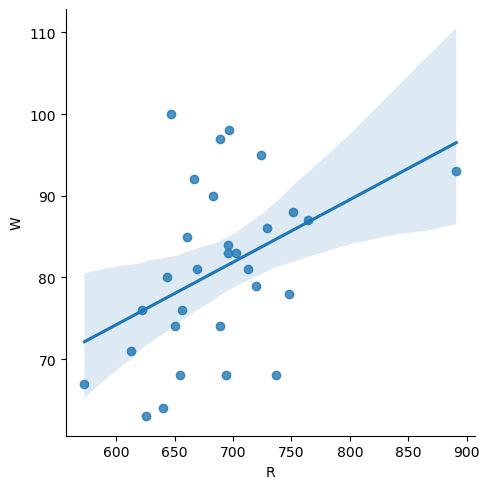

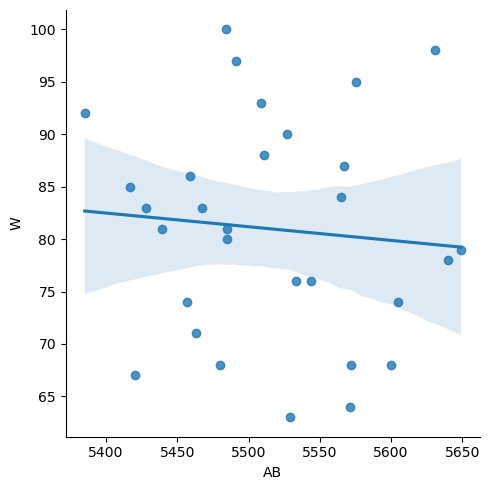

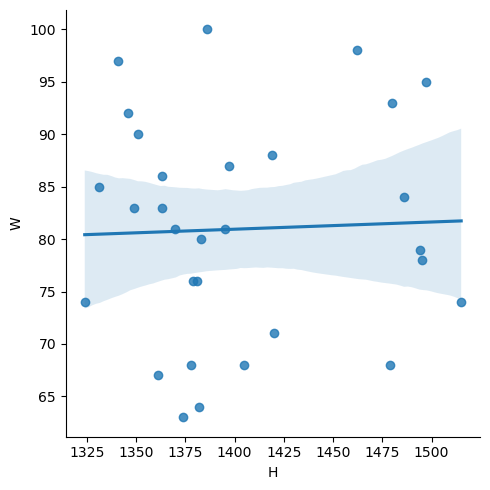

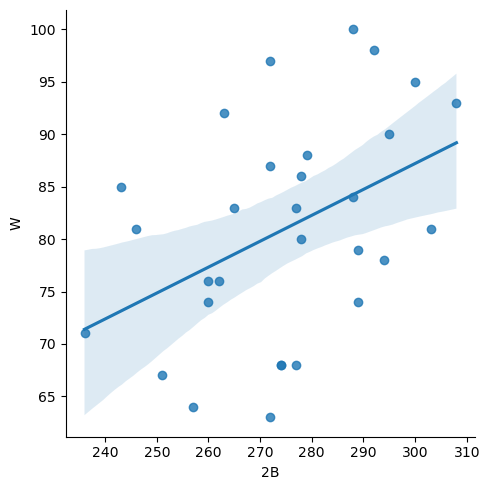

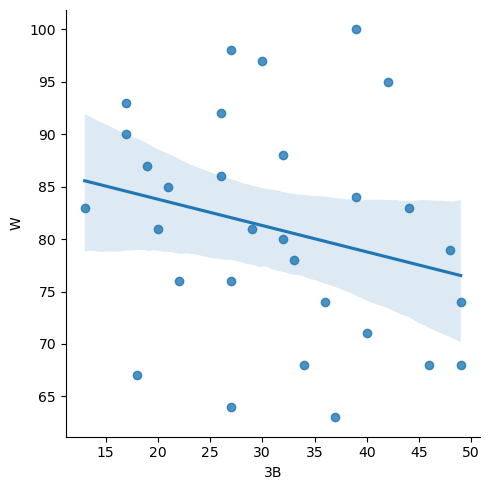

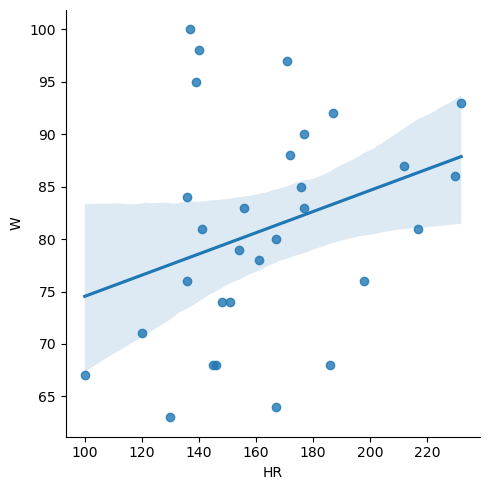

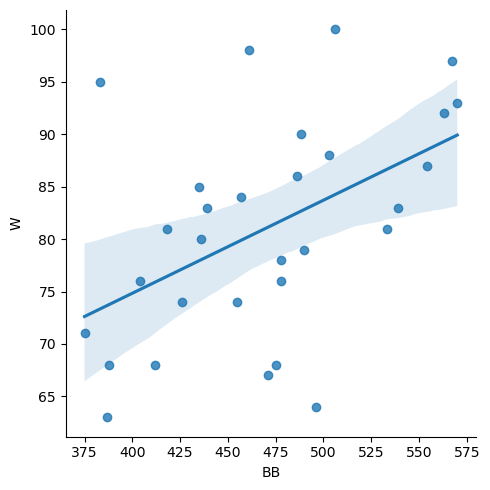

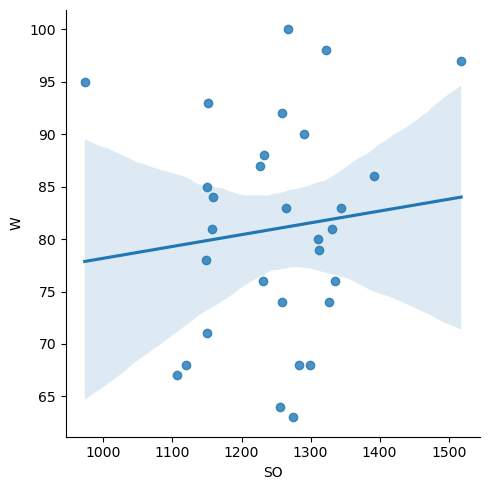

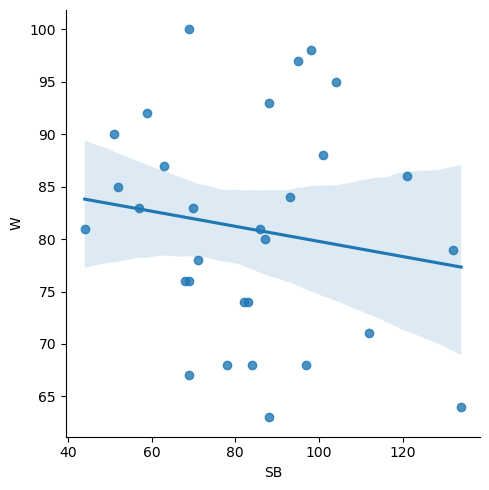

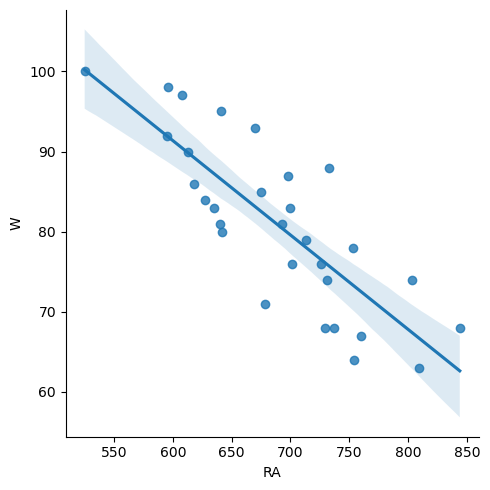

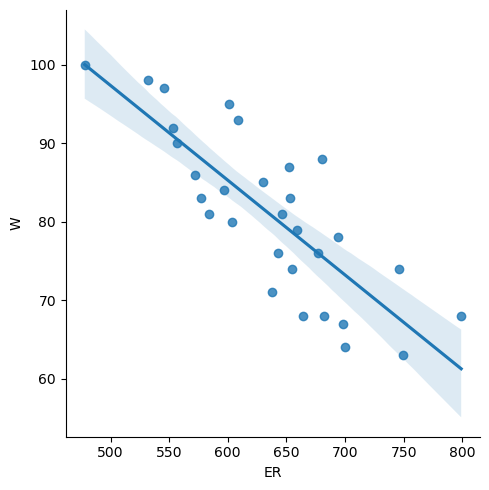

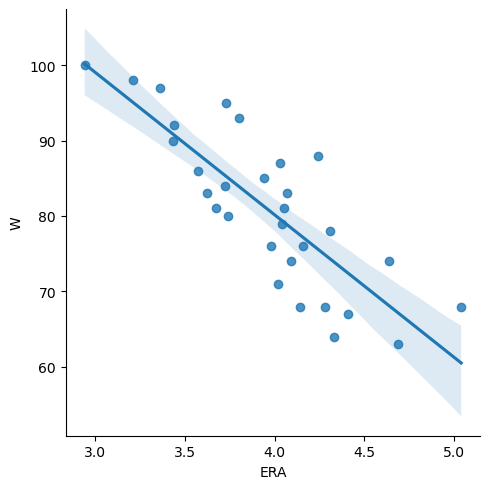

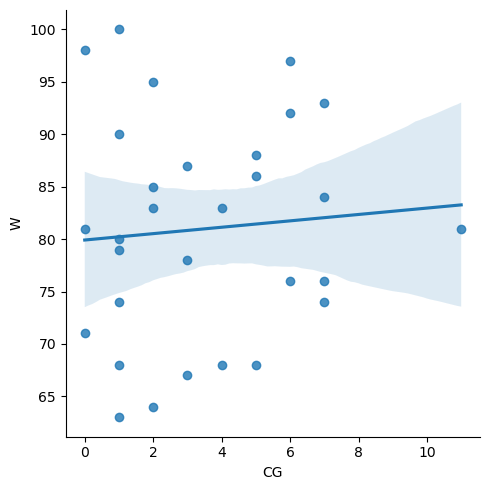

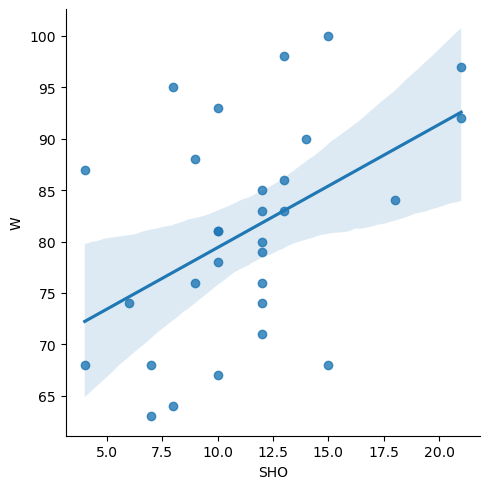

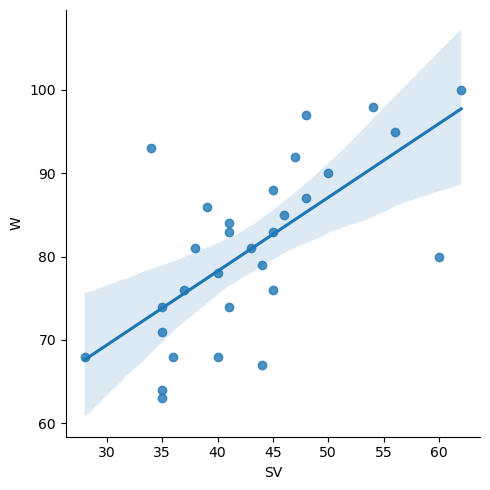

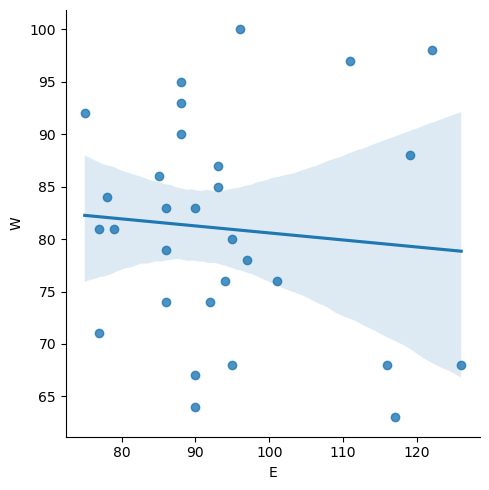

In [45]:
for i in df:
    sns.lmplot(x = i , y ='W' , data = df)

From the about plot we can see how they are proportional to Target variable W. R,SV is directly proportional to W, AB,RA,ER,ERA is inversely proportional to W, H is not much impacted by W, 2B,3B,HR,SO,SB is proportional to W,

# MULTIVARIANT ANALYSIS

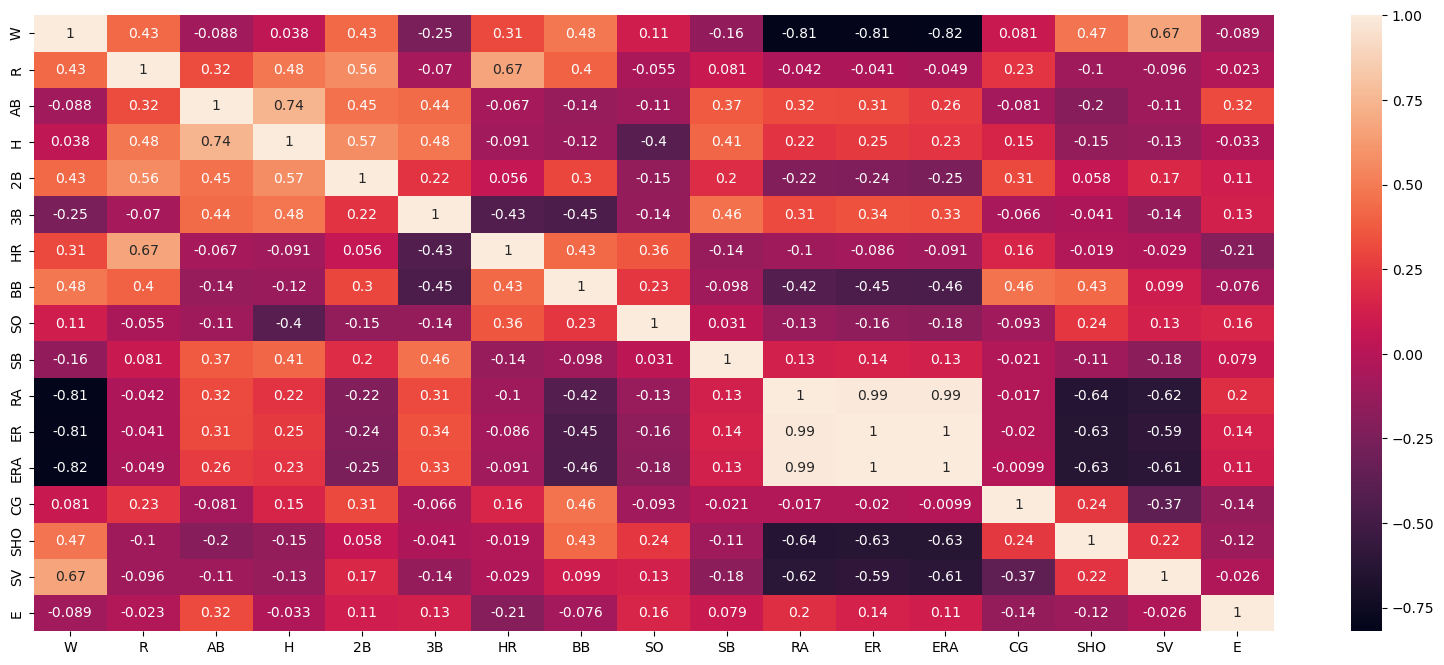

In [46]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the  heatmap,  label coloumn "W"  is showing negative correlated with feature columns "RA", "ERA" and "ER". Also there is multi colinearity between the feature columns "ER", "ERA" and "RA" data points. so,we  drop highly correlated columns to  reduce the multi collenearity  before building the model.

In [47]:
df = df.drop(["ER", "ERA"],axis=1)

In [48]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97


In [49]:
df.shape

(30, 15)

# Removing outlier

In [50]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (30, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


we use Z score method to remove outlier

In [51]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

still we can see some slight skewness

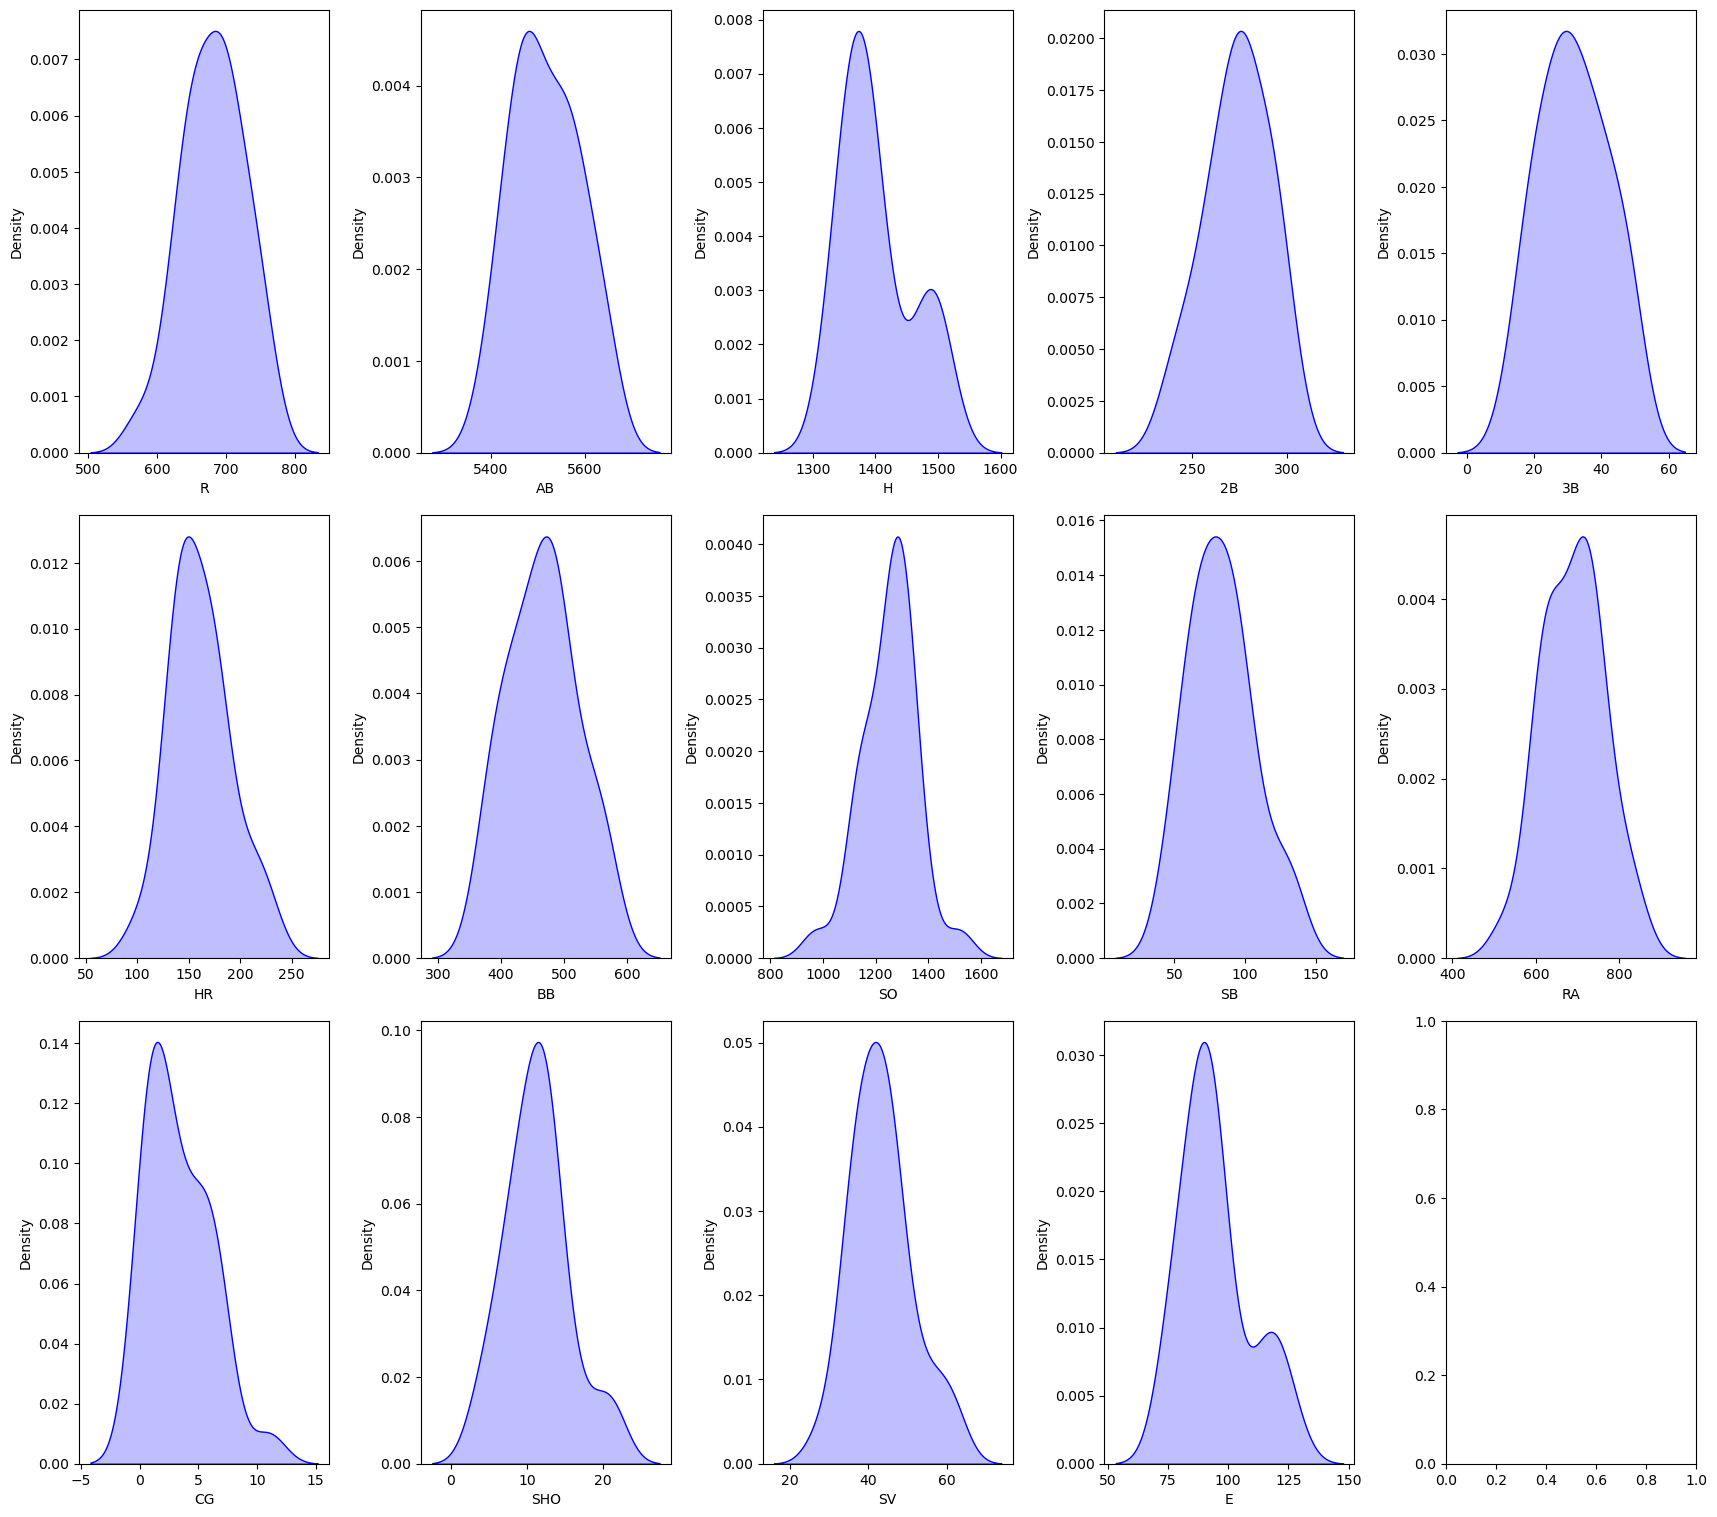

In [52]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("W", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()


From this plot,we see almost datas are normally distributed

# SPLITTING THE DATA

In [53]:
X = df.drop('W', axis=1)
Y = df['W']

# SCALING THE DATA

In [54]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898


# POWER TRANSFORM

In [55]:
pca = PCA(n_components=14, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,-2.957996,-0.953253,2.246316,-1.216994,-2.357314,0.016125,0.626783,0.394846,0.882534,0.554004,-0.258275,-0.218896,-0.176119,0.192275
1,0.240394,0.417411,0.313526,-0.266703,-0.294763,0.504699,-0.962596,1.240400,0.256176,-0.827710,0.332404,-0.199270,-0.010978,0.486047
2,0.474141,-1.106621,0.911147,3.099281,-0.796596,-0.762581,1.542021,1.355597,-0.235204,0.159777,0.549155,0.082016,0.205976,-0.116133
3,-0.109473,1.848198,0.163538,1.093046,0.300077,-1.019805,-0.127039,0.024300,-0.562258,1.324900,-0.151055,-0.102882,0.737932,0.222658
4,-2.909976,-0.777732,-0.319362,1.853279,-0.148994,0.213535,-1.046595,0.188747,-1.268692,-0.264274,-0.364419,0.118457,-0.147223,-0.268420
5,0.667623,-1.404411,-2.424945,-0.966726,-1.725726,-1.119576,1.016351,-0.453021,0.101003,-0.685705,-0.280422,-0.149604,0.698599,-0.025234
6,1.947763,0.997051,-2.042951,-1.258751,-1.728523,0.792559,-1.306637,-0.455940,-0.201846,0.328548,0.206196,0.220391,0.094941,-0.003327
7,0.939941,-0.062020,1.197914,-1.850466,0.162508,0.548143,0.150741,0.700940,-0.481820,0.298089,-0.687803,-0.378809,-0.342151,-0.146316
8,-2.383972,-1.433303,-0.623188,-0.034015,-1.169926,-1.165087,-0.411894,-0.856657,-0.244877,-0.377093,0.350590,0.165218,-0.282090,0.028534
9,-0.883912,-1.117449,-1.155980,-0.166050,0.614701,-1.047468,0.786800,0.361866,1.213722,-0.148495,-0.822724,0.475524,-0.306328,0.150268


# POWER TRANSFORM

In [56]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,-1.531314,-0.498970,1.648944,-1.012066,-2.313643,0.160763,0.858484,0.615354,1.330458,1.040373,-0.514105,-0.560659,-0.467027,0.926858
1,0.107095,0.491777,0.264410,-0.152456,-0.222672,0.618698,-1.355468,1.627497,0.506216,-1.732195,0.707081,-0.507797,0.121365,2.093866
2,0.231348,-0.637813,0.701913,2.267201,-0.705892,-0.741631,1.791532,1.755747,-0.285770,0.395032,1.130860,0.236013,0.754554,-0.513110
3,-0.077322,1.155694,0.152658,0.908262,0.317725,-1.081383,-0.067982,0.116307,-0.903286,2.107384,-0.284258,-0.249929,1.884386,1.055454
4,-1.507223,-0.346199,-0.214158,1.442298,-0.086620,0.354539,-1.497998,0.343404,-2.446157,-0.425055,-0.744902,0.330416,-0.356914,-1.324429
5,0.334721,-0.920914,-1.898773,-0.777902,-1.647266,-1.218018,1.274056,-0.601532,0.273842,-1.381634,-0.562001,-0.374556,1.814975,-0.060628
6,1.027540,0.787104,-1.585944,-1.051603,-1.650175,0.860395,-1.952420,-0.606167,-0.226670,0.682387,0.455062,0.592304,0.447967,0.044761
7,0.480910,0.201045,0.908332,-1.624805,0.196177,0.656288,0.297876,0.998391,-0.745228,0.631872,-1.465975,-0.995567,-1.159171,-0.668680
8,-1.242640,-0.949294,-0.449948,0.043601,-1.077768,-1.281211,-0.478003,-1.267010,-0.303047,-0.668205,0.743058,0.450942,-0.897050,0.195479
9,-0.479206,-0.647799,-0.870502,-0.066799,0.589530,-1.119003,1.033087,0.572677,1.713964,-0.186051,-1.774019,1.235321,-1.001225,0.745612


WE USE POWER TRANSFORM METHOD TO REMOVE OUTLIERS

# VIF

In [57]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,R,1.006200
1,AB,1.017150
2,H,1.005998
3,2B,1.007102
4,3B,1.005601
5,HR,1.011452
6,BB,1.013386
7,SO,1.007557
8,SB,1.010934
9,RA,1.002451


The value of VIF is high ie.,10 then there is high correlation

In [58]:
X.skew().sort_values

<bound method Series.sort_values of R      0.019135
AB     0.138663
H      0.002219
2B     0.010464
3B     0.012446
HR     0.073433
BB     0.004156
SO     0.028031
SB    -0.068430
RA     0.049740
CG     0.061566
SHO    0.019880
SV     0.046013
E      0.003803
dtype: float64>

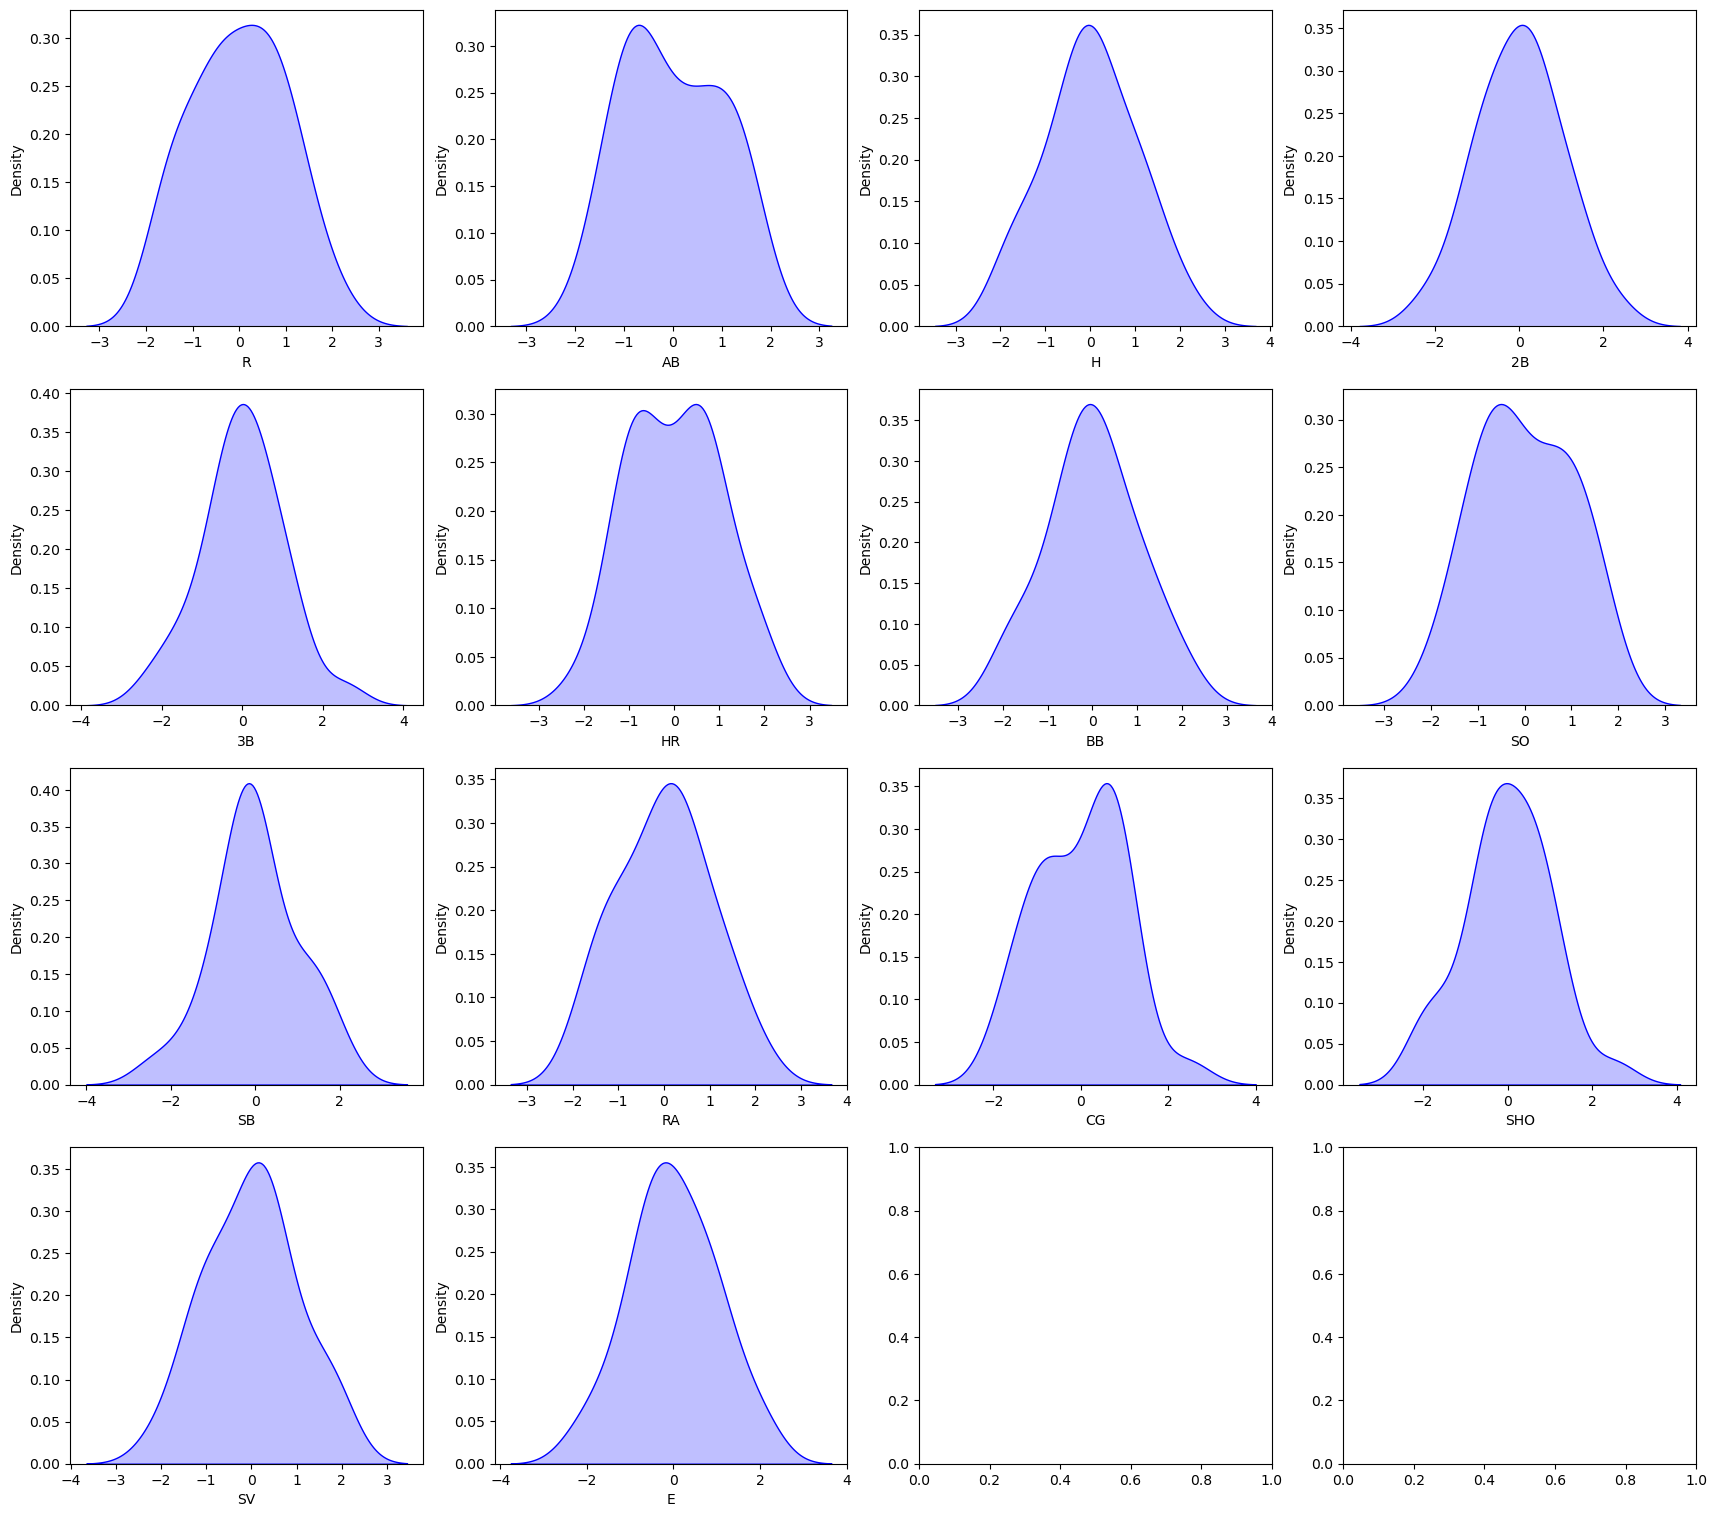

In [59]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in X.items():
    sns.distplot(value, ax=ax[index], hist=False, color="blue", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# TESTING AND TRAINING X AND Y

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

In [61]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)  ###Find best random state

Best r2 score is 0.9354003736325327 on Random State 708


# ML for Regression

In [62]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE 
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [63]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.148814583020766
R2 Score is: 93.54003736325328
Cross Validation Score: 23.06111660106318
R2 Score - Cross Validation Score is 70.4789207621901


In [64]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 3.261707698114895
R2 Score is: 93.06852107392561
Cross Validation Score: 24.999300599656983
R2 Score - Cross Validation Score is 68.06922047426863


In [65]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 3.596731549865026
R2 Score is: 91.57146918584093
Cross Validation Score: 25.91211146696103
R2 Score - Cross Validation Score is 65.6593577188799


In [66]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 11.241663577958558
R2 Score is: 17.662628524890568
Cross Validation Score: -173.3181896424058
R2 Score - Cross Validation Score is 190.98081816729638


In [67]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 11.780674900609561
R2 Score is: 9.577570281110326
Cross Validation Score: -3.009900251327373
R2 Score - Cross Validation Score is 12.587470532437699


In [68]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 12.416554603529034
R2 Score is: -0.4472463222513934
Cross Validation Score: -44.952270380446656
R2 Score - Cross Validation Score is 44.50502405819526


In [69]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 12.416554603529034
R2 Score is: -0.4472463222513934
Cross Validation Score: -44.952270380446656
R2 Score - Cross Validation Score is 44.50502405819526


In [70]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 12.7972091584201
R2 Score is: -6.700478302336177
Cross Validation Score: -191.21925165381916
R2 Score - Cross Validation Score is 184.518773351483


# HYPERPARAMETER TUNING 

In [79]:
# Choosing Linear Regression

fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [80]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [81]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [82]:
GSCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': True,
 'positive': False}

In [84]:
GSCV.best_score_

-1.0909666666416604

In [85]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -169.91506554261827


# SAVING THE MODEL

In [78]:
import pickle
filename = 'baseball.pkl'
pickle.dump(Final_Model,open(filename, 'wb'))